In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.6.0'

In [3]:
rank1_tensor = tf.Variable(["test", "Ok" ,"Time"], tf.string)
print(tf.rank(rank1_tensor))
print(rank1_tensor.shape)

tf.Tensor(1, shape=(), dtype=int32)
(3,)


In [4]:
tensor1 = tf.ones([1, 2, 3])
print(tensor1)
tensor2 = tf.reshape(tensor1, [2, 3, 1])
tensor3 = tf.reshape(tensor2, [3, -1])
print(tensor2)
print(tensor3)

tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]], shape=(1, 2, 3), dtype=float32)
tf.Tensor(
[[[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]], shape=(2, 3, 1), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)


In [5]:
t = tf.zeros([5, 5, 5, 5])
print(t)
t = tf.reshape(t, [125, -1])
print(t)

tf.Tensor(
[[[[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]]


 [[[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0.

In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib
import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf

In [7]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop("survived")

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [ ]:
dftrain.head()

In [ ]:
dftrain.describe()

In [ ]:
dftrain.shape

In [ ]:
y_train.head()

In [ ]:
dftrain.age.hist(bins=20)

In [ ]:
dftrain.sex.value_counts().plot(kind = "barh")

In [ ]:
dftrain["class"].value_counts().plot(kind="barh")

In [ ]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind="barh").set_xlabel('% survive')

In [ ]:
dfeval.shape

In [ ]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']
NUMERICAL_COLUMNS = ['age', 'fare']
feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
    vocabulary = dftrain[feature_name].unique()
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))
for feature_name in NUMERICAL_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))
print(feature_columns)

In [ ]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
        if shuffle:
            ds = ds.shuffle(1000)
        ds = ds.batch(batch_size).repeat(num_epochs)
        return ds
    return input_function
train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs = 1, shuffle=False)

In [ ]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)
clear_output()
print(result["accuracy"])

In [ ]:
result = list(linear_est.predict(eval_input_fn))
print(result[0])

In [ ]:
import tensorflow as tf
import numpy as np

In [11]:
rank_0_tensor = tf.constant(4)
print(rank_0_tensor)

tf.Tensor(4, shape=(), dtype=int32)


In [10]:
rank_1_tensor = tf.constant([2, 3, 4])
print(rank_1_tensor)

tf.Tensor([2 3 4], shape=(3,), dtype=int32)


In [8]:
rank_2_tensor = tf.constant([[1, 2], [3, 4], [5, 6]], dtype=tf.float16)
print(rank_2_tensor)

tf.Tensor(
[[1. 2.]
 [3. 4.]
 [5. 6.]], shape=(3, 2), dtype=float16)


In [9]:
rank_3_tensor = tf.constant([
    [[0, 1, 2, 3, 4],
    [5, 6, 7, 8, 9]],
    [[10, 11, 12, 13, 14],
    [15, 16, 17, 18, 19]],
    [[20, 21, 22, 23, 24],
    [25, 26, 27, 28, 29]]
])
print(rank_3_tensor)

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32)


In [12]:
np.array(rank_2_tensor)

array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float16)

In [13]:
rank_2_tensor.numpy()

array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float16)

In [14]:
a = tf.constant([[1, 2], [3, 4]])
b = tf.constant([[1, 1], [1, 1]])
print(tf.add(a, b))
print(tf.multiply(a, b))
print(tf.matmul(a, b))

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32)


In [15]:
print(a + b)
print(a * b)
print(a @ b)

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32)


In [16]:
c = tf.constant([[4, 5], [10, 1]])
print(tf.reduce_max(c))
print(tf.argmax(c))

tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor([1 0], shape=(2,), dtype=int64)


In [17]:
rank_4_tensor = tf.zeros([3, 2, 4, 5])
print("Type of every element:", rank_4_tensor.dtype)
print("Number of axis:", rank_4_tensor.ndim)
print("Shape of tensor:", rank_4_tensor.shape)
print("Elements along axis 0 of tensor:", rank_4_tensor.shape[0])
print("Elements along the last axis of tensor:", rank_4_tensor.shape[-1])
print("Total number of elements (3 * 2 * 4 * 5)", tf.size(rank_4_tensor).numpy())

Type of every element: <dtype: 'float32'>
Number of axis: 4
Shape of tensor: (3, 2, 4, 5)
Elements along axis 0 of tensor: 3
Elements along the last axis of tensor: 5
Total number of elements (3 * 2 * 4 * 5) 120


In [18]:
rank_1_tensor = tf.constant([0, 1, 1, 2, 3, 5, 8, 13, 21, 34])
print(rank_1_tensor.numpy())

[ 0  1  1  2  3  5  8 13 21 34]


In [19]:
print("First: ", rank_1_tensor[0].numpy())
print("Second: ", rank_1_tensor[1].numpy())
print("Last: ", rank_1_tensor[-1].numpy())

First:  0
Second:  1
Last:  34


In [20]:
print("Everything:", rank_1_tensor[:].numpy())
print("Before 4:", rank_1_tensor[:4].numpy())
print("From 4 to the end:", rank_1_tensor[4:].numpy())
print("From 2, before 7:", rank_1_tensor[2:7].numpy())
print("Every other item:", rank_1_tensor[::2].numpy())
print("Reversed:", rank_1_tensor[::-1].numpy())

Everything: [ 0  1  1  2  3  5  8 13 21 34]
Before 4: [0 1 1 2]
From 4 to the end: [ 3  5  8 13 21 34]
From 2, before 7: [1 2 3 5 8]
Every other item: [ 0  1  3  8 21]
Reversed: [34 21 13  8  5  3  2  1  1  0]


In [21]:
print(rank_2_tensor.numpy())

[[1. 2.]
 [3. 4.]
 [5. 6.]]


In [22]:
print(rank_2_tensor[1, 1].numpy())

4.0


In [23]:
print("Second row:", rank_2_tensor[1, :].numpy())
print("Second column:", rank_2_tensor[:, 1].numpy())
print("Last row:", rank_2_tensor[-1, :].numpy())
print("First item in last column:", rank_2_tensor[0, -1].numpy())
print("Skip the first row:")
print(rank_2_tensor[1:, :].numpy())

Second row: [3. 4.]
Second column: [2. 4. 6.]
Last row: [5. 6.]
First item in last column: 2.0
Skip the first row:
[[3. 4.]
 [5. 6.]]


In [24]:
print(rank_3_tensor[:, :, 4])

tf.Tensor(
[[ 4  9]
 [14 19]
 [24 29]], shape=(3, 2), dtype=int32)


In [25]:
x = tf.constant([[1], [2], [3]])
print(x.shape)

(3, 1)


In [26]:
import tensorflow as tf
import numpy as np

In [27]:
x = tf.constant([[1], [2], [3]])
print(x.shape)

(3, 1)


In [28]:
print(x.shape.as_list())

[3, 1]


In [29]:
reshaped = tf.reshape(x, [1, 3])
print(x.shape)
print(reshaped.shape)

(3, 1)
(1, 3)


In [30]:
print(tf.reshape(rank_3_tensor, [-1]))

tf.Tensor(
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29], shape=(30,), dtype=int32)


In [31]:
print(tf.reshape(rank_3_tensor, [3*2, 5]))
print(tf.reshape(rank_3_tensor, [3, -1]))

tf.Tensor(
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]], shape=(6, 5), dtype=int32)
tf.Tensor(
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]], shape=(3, 10), dtype=int32)


In [32]:
print(tf.reshape(rank_3_tensor, [2, 3, 5]))
print(tf.reshape(rank_3_tensor, [5, 6]))
try: 
    tf.reshape(rank_3_tensor, [7, -1])
except Exception as e:
    print(f"{type(e).__name__}: {e}")

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]]

 [[15 16 17 18 19]
  [20 21 22 23 24]
  [25 26 27 28 29]]], shape=(2, 3, 5), dtype=int32)
tf.Tensor(
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]], shape=(5, 6), dtype=int32)
InvalidArgumentError: Input to reshape is a tensor with 30 values, but the requested shape requires a multiple of 7 [Op:Reshape]


In [34]:
the_f64_tensor = tf.constant([2.2, 3.3, 4.4], dtype=tf.float64)
the_f16_tensor = tf.cast(the_f64_tensor, dtype=tf.float16)
the_u8_tensor = tf.cast(the_f16_tensor, dtype=tf.uint8)
print(the_u8_tensor)

tf.Tensor([2 3 4], shape=(3,), dtype=uint8)


In [35]:
x = tf.constant([1, 2, 3])
y = tf.constant(2)
z = tf.constant([2, 2, 2])
print(tf.multiply(x, 2))
print(x * y)
print(x * z)

tf.Tensor([2 4 6], shape=(3,), dtype=int32)
tf.Tensor([2 4 6], shape=(3,), dtype=int32)
tf.Tensor([2 4 6], shape=(3,), dtype=int32)


In [36]:
x = tf.reshape(x, [3, 1])
y = tf.range(1, 5)
print(x)
print(y)
print(tf.multiply(x, y))

tf.Tensor(
[[1]
 [2]
 [3]], shape=(3, 1), dtype=int32)
tf.Tensor([1 2 3 4], shape=(4,), dtype=int32)
tf.Tensor(
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]], shape=(3, 4), dtype=int32)


In [37]:
x_stretch = tf.constant([[1, 1, 1, 1],
                        [2, 2, 2, 2],
                        [3, 3, 3, 3]])
y_stretch = tf.constant([[1, 2, 3, 4],
                        [1, 2, 3, 4],
                        [1, 2, 3, 4]])
print(x_stretch * y_stretch)

tf.Tensor(
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]], shape=(3, 4), dtype=int32)


In [39]:
print(tf.broadcast_to(tf.constant([1, 2, 3]), [3, 3]))

tf.Tensor(
[[1 2 3]
 [1 2 3]
 [1 2 3]], shape=(3, 3), dtype=int32)


In [40]:
ragged_list = [
    [0, 1, 2, 3],
    [4, 5],
    [6, 7, 8],
    [9]
]
ragged_tensor = tf.ragged.constant(ragged_list)
print(ragged_tensor)

<tf.RaggedTensor [[0, 1, 2, 3], [4, 5], [6, 7, 8], [9]]>


In [41]:
print(ragged_tensor.shape)

(4, None)


In [42]:
scalar_string_tensor = tf.constant("Gray wolf")
print(scalar_string_tensor)

tf.Tensor(b'Gray wolf', shape=(), dtype=string)


In [44]:
tensor_of_strings = tf.constant(["Gray wolf","Quick brown fox", "Lazy dog"])
print(tensor_of_strings)

tf.Tensor([b'Gray wolf' b'Quick brown fox' b'Lazy dog'], shape=(3,), dtype=string)


In [45]:
print(tf.strings.split(scalar_string_tensor, sep=" "))

tf.Tensor([b'Gray' b'wolf'], shape=(2,), dtype=string)


In [46]:
print(tf.strings.split(tensor_of_strings))

<tf.RaggedTensor [[b'Gray', b'wolf'], [b'Quick', b'brown', b'fox'], [b'Lazy', b'dog']]>


In [48]:
text = tf.constant("1 10 100")
print(tf.strings.to_number(tf.strings.split(text, " ")))

tf.Tensor([  1.  10. 100.], shape=(3,), dtype=float32)


In [50]:
byte_strings = tf.strings.bytes_split(tf.constant("Duck"))
byte_ints = tf.io.decode_raw(tf.constant("Duck"), tf.uint8)
print("Byte strings:", byte_strings)
print("Bytes:", byte_ints)

Byte strings: tf.Tensor([b'D' b'u' b'c' b'k'], shape=(4,), dtype=string)
Bytes: tf.Tensor([ 68 117  99 107], shape=(4,), dtype=uint8)


## Variables

In [51]:
my_tensor = tf.constant([[1, 2], [3, 4]])
my_variable = tf.Variable(my_tensor)
bool_variable = tf.Variable([False, False, False, True])
complex_variable = tf.Variable([5 + 4j, 6 + 1j])

In [52]:
print("Shape:", my_variable.shape)
print("DType:", my_variable.dtype)
print("As Numpy", my_variable.numpy())

Shape: (2, 2)
DType: <dtype: 'int32'>
As Numpy [[1 2]
 [3 4]]


In [53]:
print("A variable:", my_variable)
print("Viewed as a tensor:", tf.convert_to_tensor(my_variable))
print("Index of highest value:", tf.argmax(my_variable))
print("Copying and reshaping:", tf.reshape(my_variable, [1, 4]))

A variable: <tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[1, 2],
       [3, 4]])>
Viewed as a tensor: tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
Index of highest value: tf.Tensor([1 1], shape=(2,), dtype=int64)
Copying and reshaping: tf.Tensor([[1 2 3 4]], shape=(1, 4), dtype=int32)


In [54]:
a = tf.Variable([2, 3])
a.assign([1, 2])
try:
    a.assign([1, 2, 3])
except Exception as e:
    print(f"{type(e).__name__}: {e}")

ValueError: Cannot assign to variable Variable:0 due to variable shape (2,) and value shape (3,) are incompatible


In [55]:
a = tf.Variable([2, 3])
b = tf.Variable(a)
a.assign([5, 6])
print(a.numpy())
print(b.numpy())
print(a.assign_add([2, 3]).numpy())
print(a.assign_sub([7, 9]).numpy())

[5 6]
[2 3]
[7 9]
[0 0]


In [56]:
a = tf.Variable(my_tensor, name="Mark")
b = tf.Variable(my_tensor + 1, name="Mark")
print(a==b)

tf.Tensor(
[[False False]
 [False False]], shape=(2, 2), dtype=bool)


In [57]:
step_counter = tf.Variable(1, trainable=False)

In [58]:
with tf.device('CPU:0'):
    a = tf.Variable([[1, 2, 3], [4, 5, 6]])
    b = tf.constant([[1, 2], [3, 4], [5, 6]])
    c = tf.matmul(a, b)
print(c)

tf.Tensor(
[[22 28]
 [49 64]], shape=(2, 2), dtype=int32)


In [60]:
with tf.device('CPU:0'):
    a = tf.Variable([[1, 2, 3], [4, 5, 6]])
    b = tf.Variable([[1, 2, 3]])
with tf.device('GPU:0'):
    k = a * b
print(k)

tf.Tensor(
[[ 1  4  9]
 [ 4 10 18]], shape=(2, 3), dtype=int32)


## Automatic Differentiation and Gradients

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [7]:
x = tf.Variable(3.0)
with tf.GradientTape() as tape:
    y = x ** 2
dy_dx = tape.gradient(y, x)
dy_dx.numpy()

6.0

In [8]:
w = tf.Variable(tf.random.normal((3, 2)), name="w")
b = tf.Variable(tf.zeros(2, dtype=tf.float32), name='b')
x = [[1., 2., 3.]]
with tf.GradientTape(persistent=True) as tape:
    y = x @ w + b
    loss = tf.reduce_mean(y ** 2)
[dl_dw, dl_db] = tape.gradient(loss, [w, b])
print(w.shape)
print(dl_dw.shape)

(3, 2)
(3, 2)


In [10]:
my_vars = {
    'w' : w,
    'b' : b
}
grad = tape.gradient(loss, my_vars)
grad['b']

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-2.6076584,  4.385829 ], dtype=float32)>

In [11]:
layer = tf.keras.layers.Dense(2, activation='relu')
x = tf.constant([[1., 2., 3.]])
with tf.GradientTape() as tape:
    y = layer(x)
    loss = tf.reduce_mean(y ** 2)
grad = tape.gradient(loss, layer.trainable_variables)

In [13]:
for var, g in zip(layer.trainable_variables, grad):
    print(f"{var.name}, shape: {g.shape}")

dense/kernel:0, shape: (3, 2)
dense/bias:0, shape: (2,)


In [14]:
x0 = tf.Variable(3.0, name='x0')
x1 = tf.Variable(3.0, name='x1', trainable=False)
x2 = tf.Variable(2.0, name='x2') + 1.0
x3 = tf.Variable(3.0, name='x3')
with tf.GradientTape() as tape:
    y = (x0 ** 2) + (x1 ** 2) + (x3 ** 2)
grad = tape.gradient(y, [x0, x1, x2, x3])
for g in grad:
    print(g)

tf.Tensor(6.0, shape=(), dtype=float32)
None
None
tf.Tensor(6.0, shape=(), dtype=float32)


In [15]:
[var.name for var in tape.watched_variables()]

['x0:0', 'x3:0']

In [16]:
x = tf.constant(3.0)
with tf.GradientTape() as tape:
    tape.watch(x)
    y = x ** 2
dy_dx = tape.gradient(y, x)
print(dy_dx.numpy())

6.0


In [27]:
import numpy as np
import numpy
x = tf.constant(3.0)
with tf.GradientTape() as tape:
    tape.watch(x)
    y = x * x
    z = y * y
print(tape.gradient(z, y).numpy())

18.0


In [28]:
x = tf.constant([1, 3.0])
with tf.GradientTape(persistent=True) as tape:
    tape.watch(x)
    y = x * x
    z = y * y
print(tape.gradient(z, x).numpy())
print(tape.gradient(y, x).numpy())

[  4. 108.]
[2. 6.]


In [30]:
x = tf.Variable(2.0)
with tf.GradientTape(persistent=True) as tape:
    y0 = x ** 2
    y1 = 1 / x
print(tape.gradient(y0, x).numpy())
print(tape.gradient(y1, x).numpy())

4.0
-0.25


In [31]:
x = tf.Variable(2.0)
with tf.GradientTape() as tape:
    y0 = x ** 2
    y1 = 1 / x
print(tape.gradient({'y0':y0, 'y1':y1}, x).numpy())

3.75


In [34]:
x = tf.Variable(2.)
with tf.GradientTape() as tape:
    y = x * [3., 4.]
print(tape.gradient(y, x).numpy())

7.0


In [35]:
x = tf.linspace(-10.0, 10.0, 200 + 1)
with tf.GradientTape() as tape:
    tape.watch(x)
    y = tf.nn.sigmoid(x)
dy_dx = tape.gradient(y, x)

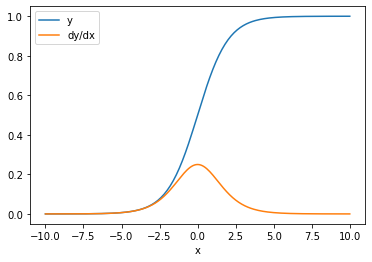

In [36]:
plt.plot(x, y, label='y')
plt.plot(x, dy_dx, label="dy/dx")
plt.legend()
_ = plt.xlabel('x')

In [38]:
x = tf.constant(1.0)
v0 = tf.Variable(2.0)
v1 = tf.Variable(2.0)
with tf.GradientTape(persistent=True) as tape:
    tape.watch(x)
    if x > 0.0:
        result = v0
    else:
        result = v1 ** 2
dv0, dv1 = tape.gradient(result, [v0, v1])
print(dv0)
print(dv1)

tf.Tensor(1.0, shape=(), dtype=float32)
None


## Introduction to graph and tf.function

In [4]:
import tensorflow as tf
import timeit
from datetime import datetime

AttributeError: module 'tensorflow.python.util.dispatch' has no attribute 'add_fallback_dispatch_list'

In [42]:
def a_regular_function(x, y, b):
    x = tf.matmul(x, y)
    x = x + b
    return x

a_function_that_uses_a_graph = tf.function(a_regular_function)
x1 = tf.constant([[1.0, 2.0]])
y1 = tf.constant([[2.0], [3.0]])
b1 = tf.constant(4.0)

orig_value = a_regular_function(x1, y1, b1).numpy()
tf_function_value = a_function_that_uses_a_graph(x1, y1, b1).numpy()
assert(orig_value == tf_function_value)

In [43]:
def inner_function(x, y, b):
    x = tf.matmul(x, y)
    x = x + b
    return x

@tf.function
def outer_function(x):
    y = tf.constant([[2.0], [3.0]])
    b = tf.constant(4.0)
    return inner_function(x, y, b)
outer_function(tf.constant([[1.0, 2.0]])).numpy()

array([[12.]], dtype=float32)

In [44]:
def simple_relu(x):
    if tf.greater(x, 0):
        return x
    else:
        return 0
tf_simple_relu = tf.function(simple_relu)
print("First branch, with graph:", tf_simple_relu(tf.constant(1)).numpy())
print("Second branch, with graph:", tf_simple_relu(tf.constant(-1)).numpy())

First branch, with graph: 1
Second branch, with graph: 0


In [45]:
print(tf.autograph.to_code(simple_relu))

def tf__simple_relu(x):
    with ag__.FunctionScope('simple_relu', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()

        def get_state():
            return (do_return, retval_)

        def set_state(vars_):
            nonlocal retval_, do_return
            (do_return, retval_) = vars_

        def if_body():
            nonlocal retval_, do_return
            try:
                do_return = True
                retval_ = ag__.ld(x)
            except:
                do_return = False
                raise

        def else_body():
            nonlocal retval_, do_return
            try:
                do_return = True
                retval_ = 0
            except:
                do_return = False
                raise
        ag__.if_stmt(ag__.converted_call(ag__.ld(tf).greater, (ag__.ld(x), 0), None, fscope), if_bo

In [46]:
print(tf_simple_relu.get_concrete_function(tf.constant(1)).graph.as_graph_def())

node {
  name: "x"
  op: "Placeholder"
  attr {
    key: "_user_specified_name"
    value {
      s: "x"
    }
  }
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "shape"
    value {
      shape {
      }
    }
  }
}
node {
  name: "Greater/y"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 0
      }
    }
  }
}
node {
  name: "Greater"
  op: "Greater"
  input: "x"
  input: "Greater/y"
  attr {
    key: "T"
    value {
      type: DT_INT32
    }
  }
}
node {
  name: "cond"
  op: "StatelessIf"
  input: "Greater"
  input: "x"
  attr {
    key: "Tcond"
    value {
      type: DT_BOOL
    }
  }
  attr {
    key: "Tin"
    value {
      list {
        type: DT_INT32
      }
    }
  }
  attr {
    key: "Tout"
    value {
      list {
        type: DT_BOOL
        type: DT_INT32
      }
    }
  

In [47]:
@tf.function
def my_relu(x):
    return tf.maximum(0., x)
print(my_relu(tf.constant(5.5)))
print(my_relu([1, -1]))
print(my_relu(tf.constant([3., -3.])))

tf.Tensor(5.5, shape=(), dtype=float32)
tf.Tensor([1. 0.], shape=(2,), dtype=float32)
tf.Tensor([3. 0.], shape=(2,), dtype=float32)


In [48]:
print(my_relu(tf.constant(-2.5)))
print(my_relu(tf.constant([-1., 1.])))

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor([0. 1.], shape=(2,), dtype=float32)


In [49]:
print(my_relu.pretty_printed_concrete_signatures())

my_relu(x)
  Args:
    x: float32 Tensor, shape=()
  Returns:
    float32 Tensor, shape=()

my_relu(x=[1, -1])
  Returns:
    float32 Tensor, shape=(2,)

my_relu(x)
  Args:
    x: float32 Tensor, shape=(2,)
  Returns:
    float32 Tensor, shape=(2,)


In [50]:
@tf.function
def get_MSE(y_true, y_pred):
    sq_diff = tf.pow(y_true - y_pred, 2)
    return tf.reduce_mean(sq_diff)

In [51]:
y_true = tf.random.uniform([5], maxval=10, dtype=tf.int32)
y_pred = tf.random.uniform([5], maxval=10, dtype=tf.int32)
print(y_true)
print(y_pred)

tf.Tensor([6 1 5 0 6], shape=(5,), dtype=int32)
tf.Tensor([2 8 0 1 7], shape=(5,), dtype=int32)


In [53]:
get_MSE(y_true, y_pred)

<tf.Tensor: shape=(), dtype=int32, numpy=18>

In [55]:
@tf.function
def get_MSE(y_true, y_pred):
    print("Calculating MSE!")
    sq_diff = tf.pow(y_true - y_pred, 2)
    return tf.reduce_mean(sq_diff)

In [56]:
error = get_MSE(y_true, y_pred)
error = get_MSE(y_true, y_pred)
error = get_MSE(y_true, y_pred)

Calculating MSE!


In [57]:
def unused_return_eager(x):
    tf.gather(x, [1])
    return x
try:
    print(unused_return_eager(tf.constant([0.0])))
except tf.errors.InvalidArgumentError as e:
    print(f"{type(e).__name__}: {e}")

InvalidArgumentError: indices[0] = 1 is not in [0, 1) [Op:GatherV2]


In [58]:
@tf.function
def unused_return_graph(x):
    tf.gather(x, [1])
    return x
print(unused_return_graph(tf.constant([0.0])))

tf.Tensor([0.], shape=(1,), dtype=float32)


In [59]:
x = tf.random.uniform(shape=[10, 10], minval=-1, maxval=2, dtype=tf.dtypes.int32)
def power(x, y):
    result = tf.eye(10, dtype=tf.dtypes.int32)
    for _ in range(y):
        result = tf.matmul(x, result)
    return result

In [60]:
print("Eager execution:", timeit.timeit(lambda: power(x, 100), number=1000))

Eager execution: 2.4275727000003826


In [61]:
power_as_graph = tf.function(power)
print("graph execution:", timeit.timeit(lambda: power_as_graph(x, 100), number=1000))

graph execution: 0.55863970000064


In [62]:
@tf.function
def a_function_with_python_side_effect(x):
    print("Tracing!")
    return x * x + tf.constant(2)
print(a_function_with_python_side_effect(tf.constant(2)))
print(a_function_with_python_side_effect(tf.constant(3)))

Tracing!
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(11, shape=(), dtype=int32)


In [63]:
print(a_function_with_python_side_effect(2))
print(a_function_with_python_side_effect(3))

Tracing!
tf.Tensor(6, shape=(), dtype=int32)
Tracing!
tf.Tensor(11, shape=(), dtype=int32)


## Introduction to modules, layers, and models

In [1]:
import tensorflow as tf
from datetime import datetime
%load_ext tensorboard

In [2]:
class SimpleModule(tf.Module):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.a_variable = tf.Variable(5.0, name="train_me")
        self.non_trainable_variable = tf.Variable(5.0, trainable=False, name="do_not_train_me")
    def __call__(self, x):
        return self.a_variable * x + self.non_trainable_variable
simple_module = SimpleModule(name="simple")
simple_module(tf.constant(5.0))

<tf.Tensor: shape=(), dtype=float32, numpy=30.0>

In [3]:
print("trainable variables:", simple_module.trainable_variables)
print("all variables:", simple_module.variables)

trainable variables: (<tf.Variable 'train_me:0' shape=() dtype=float32, numpy=5.0>,)
all variables: (<tf.Variable 'train_me:0' shape=() dtype=float32, numpy=5.0>, <tf.Variable 'do_not_train_me:0' shape=() dtype=float32, numpy=5.0>)


In [4]:
class Dense(tf.Module):
    def __init__(self, in_features, out_features, name=None):
        super().__init__(name=name)
        self.w = tf.Variable(tf.random.normal([in_features, out_features]), name='w')
        self.b = tf.Variable(tf.zeros([out_features]), name="b")
    def __call__(self, x):
        y = tf.matmul(x, self.w) + self.b
        return tf.nn.relu(y)

In [5]:
class SequentialModule(tf.Module):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.dense_1 = Dense(in_features=3, out_features=3)
        self.dense_2 = Dense(in_features=3, out_features=2)
    def __call__(self, x):
        x = self.dense_1(x)
        return self.dense_2(x)
my_model = SequentialModule(name="the_model")
print("Model results:", my_model(tf.constant([[2.0, 2.0, 2.0]])))

Model results: tf.Tensor([[0.        2.3471105]], shape=(1, 2), dtype=float32)


In [6]:
print("Submodules:", my_model.submodules)

Submodules: (<__main__.Dense object at 0x000002D7532E2430>, <__main__.Dense object at 0x000002D75313D100>)


In [8]:
for var in my_model.variables:
    print(var)

<tf.Variable 'b:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>
<tf.Variable 'w:0' shape=(3, 3) dtype=float32, numpy=
array([[ 1.2266444 ,  0.37642404, -0.53824896],
       [-1.0583857 , -0.6239649 ,  1.3263968 ],
       [-2.2136488 , -0.09663779,  0.18905614]], dtype=float32)>
<tf.Variable 'b:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>
<tf.Variable 'w:0' shape=(3, 2) dtype=float32, numpy=
array([[ 0.47897533, -0.09857993],
       [-0.3388398 , -0.5117008 ],
       [-1.9362491 ,  1.2009317 ]], dtype=float32)>


In [9]:
class FlexibleDenseModule(tf.Module):
    def __init__(self, out_features, name=None):
        super().__init__(name=name)
        self.is_built = False
        self.out_features = out_features
    def __call__(self, x):
        if not self.is_built:
            self.w = tf.Variable(tf.random.normal([x.shape[-1], self.out_features]), name="w")
            self.b = tf.Variable(tf.zeros([self.out_features]), name="b")
            self.is_built = True
        y = tf.matmul(x, self.w) + self.b
        return tf.nn.relu(y)

In [10]:
class MySequentialModule(tf.Module):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.dense_1 = FlexibleDenseModule(out_features=3)
        self.dense_2 = FlexibleDenseModule(out_features=2)
    def __call__(self, x):
        x = self.dense_1(x)
        return self.dense_2(x)
my_model = MySequentialModule(name="the_model")
print("Model resultes:", my_model(tf.constant([[2.0, 2.0, 2.0]])))

Model resultes: tf.Tensor([[2.4515336 0.       ]], shape=(1, 2), dtype=float32)


In [11]:
chkp_path = "my_checkpoint"
checkpoint = tf.train.Checkpoint(model=my_model)
checkpoint.write(chkp_path)

'my_checkpoint'

In [12]:
ls my_checkpoint*

 Volume in drive C is Windows
 Volume Serial Number is AC25-E563

 Directory of C:\Users\jatin

17/10/2021  07:49 PM               427 my_checkpoint.data-00000-of-00001
17/10/2021  07:49 PM               362 my_checkpoint.index
               2 File(s)            789 bytes
               0 Dir(s)  36,173,053,952 bytes free


In [13]:
tf.train.list_variables(chkp_path)

[('_CHECKPOINTABLE_OBJECT_GRAPH', []),
 ('model/dense_1/b/.ATTRIBUTES/VARIABLE_VALUE', [3]),
 ('model/dense_1/w/.ATTRIBUTES/VARIABLE_VALUE', [3, 3]),
 ('model/dense_2/b/.ATTRIBUTES/VARIABLE_VALUE', [2]),
 ('model/dense_2/w/.ATTRIBUTES/VARIABLE_VALUE', [3, 2])]

In [14]:
new_model = MySequentialModule()
new_checkpoint = tf.train.Checkpoint(model=new_model)
new_checkpoint.restore("my_checkpoint")
new_model(tf.constant([[2.0, 2.0, 2.0]]))

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[2.4515336, 0.       ]], dtype=float32)>

In [15]:
class MySequentialModule(tf.Module):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.dense_1 = Dense(in_features=3, out_features=3)
        self.dense_2 = Dense(in_features=3, out_features=2)
    @tf.function
    def __call__(self, x):
        x = self.dense_1(x)
        return self.dense_2(x)
my_model = MySequentialModule(name="the_model")

In [16]:
print(my_model([[2.0, 2.0, 2.0]]))
print(my_model([[[2.0, 2.0, 2.0], [2.0, 2.0, 2.0]]]))

tf.Tensor([[0. 0.]], shape=(1, 2), dtype=float32)
tf.Tensor(
[[[0. 0.]
  [0. 0.]]], shape=(1, 2, 2), dtype=float32)


In [17]:
stamp = datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = "logs/func/%s"%stamp
writer = tf.summary.create_file_writer(logdir)
new_model = MySequentialModule()

tf.summary.trace_on(graph=True)
tf.profiler.experimental.start(logdir)
z = print(new_model(tf.constant([[2.0, 2.0, 2.0]])))
with writer.as_default():
    tf.summary.trace_export(name="my_func_trace", step=0, profiler_outdir=logdir)

tf.Tensor([[3.1967435 0.       ]], shape=(1, 2), dtype=float32)


In [18]:
tf.saved_model.save(my_model, "the_saved_model")

INFO:tensorflow:Assets written to: the_saved_model\assets


In [19]:
ls -l the_saved_model

 Volume in drive C is Windows

File Not Found



 Volume Serial Number is AC25-E563

 Directory of C:\Users\jatin


 Directory of C:\Users\jatin\the_saved_model

17/10/2021  07:50 PM    <DIR>          .
17/10/2021  07:50 PM    <DIR>          ..
17/10/2021  05:58 PM    <DIR>          assets
17/10/2021  07:50 PM            14,696 saved_model.pb
17/10/2021  07:50 PM    <DIR>          variables
               1 File(s)         14,696 bytes
               4 Dir(s)  36,173,152,256 bytes free


In [20]:
new_model = tf.saved_model.load("the_saved_model")

In [21]:
isinstance(new_model, SequentialModule)

False

In [23]:
print(my_model([[2.0, 2.0, 2.0]]))
print(new_model([[[2.0, 2.0, 2.0], [2.0, 2.0, 2.0]]]))

tf.Tensor([[0. 0.]], shape=(1, 2), dtype=float32)
tf.Tensor(
[[[0. 0.]
  [0. 0.]]], shape=(1, 2, 2), dtype=float32)


In [24]:
class MyDense(tf.keras.layers.Layer):
    def __init__(self, in_features, out_features, **kwargs):
        super().__init__(**kwargs)
        self.w = tf.Variable(tf.random.normal([in_features, out_features]), name='w')
        self.b = tf.Variable(tf.zeros([out_features]), name="b")
    def call(self, x):
        y = tf.matmul(x, self.w) + self.b
        return tf.nn.relu(y)
simple_layer = MyDense(name="simple", in_features=3, out_features=3)

In [25]:
simple_layer([[2.0, 2.0, 2.0]])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0., 0., 0.]], dtype=float32)>

In [26]:
class FlexibleDense(tf.keras.layers.Layer):
    def __init__(self, out_features, **kwargs):
        super().__init__(**kwargs)
        self.out_features = out_features
    def build(self, input_shape):
        self.w = tf.Variable(tf.random.normal([input_shape[-1], self.out_features]), name="w")
        self.b = tf.Variable(tf.zeros([self.out_features]), name='b')
    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b
flexible_dense = FlexibleDense(out_features=3)

In [28]:
flexible_dense.variables

[]

In [29]:
print("Model results:", flexible_dense(tf.constant([[2.0, 2.0, 2.0], [3.0, 3.0, 3.0]])))

Model results: tf.Tensor(
[[-1.1398141 -1.5765646 -5.6756306]
 [-1.7097214 -2.3648467 -8.513446 ]], shape=(2, 3), dtype=float32)


In [30]:
flexible_dense.variables

[<tf.Variable 'flexible_dense/w:0' shape=(3, 3) dtype=float32, numpy=
 array([[-1.9550602 ,  0.8132839 , -0.6512151 ],
        [ 1.1138214 , -0.9533857 , -1.885994  ],
        [ 0.27133182, -0.6481805 , -0.30060622]], dtype=float32)>,
 <tf.Variable 'flexible_dense/b:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]

In [34]:
class MySequentialModel(tf.keras.Model):
    def __init__(self, name=None, **kwargs):
        super().__init__(**kwargs)
        self.dense_1 = FlexibleDense(out_features=3)
        self.dense_2 = FlexibleDense(out_features=2)
    def call(self, x):
        x = self.dense_1(x)
        return self.dense_2(x)
my_sequential_model = MySequentialModel(name="the_model")
print("Model results:", my_sequential_model(tf.constant([[2.0, 2.0, 2.0]])))

Model results: tf.Tensor([[0.58046293 2.093892  ]], shape=(1, 2), dtype=float32)


In [35]:
my_sequential_model.variables

[<tf.Variable 'my_sequential_model_3/flexible_dense_7/w:0' shape=(3, 3) dtype=float32, numpy=
 array([[-0.4190875 ,  0.69975454, -0.0612506 ],
        [ 1.126664  ,  0.24278554, -0.5032325 ],
        [ 0.5091365 , -0.8345903 ,  0.72419107]], dtype=float32)>,
 <tf.Variable 'my_sequential_model_3/flexible_dense_7/b:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>,
 <tf.Variable 'my_sequential_model_3/flexible_dense_8/w:0' shape=(3, 2) dtype=float32, numpy=
 array([[ 0.39971134,  1.0033268 ],
        [-0.5132254 , -2.1381242 ],
        [-0.8809828 ,  0.35687163]], dtype=float32)>,
 <tf.Variable 'my_sequential_model_3/flexible_dense_8/b:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>]

In [36]:
my_sequential_model.submodules

(<__main__.FlexibleDense at 0x2d754bc2ac0>,
 <__main__.FlexibleDense at 0x2d7549fc6a0>)

In [38]:
inputs = tf.keras.Input(shape=[3,])
x = FlexibleDense(3)(inputs)
x = FlexibleDense(2)(x)
my_functional_model = tf.keras.Model(inputs=inputs, outputs=x)
my_functional_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
flexible_dense_11 (FlexibleD (None, 3)                 12        
_________________________________________________________________
flexible_dense_12 (FlexibleD (None, 2)                 8         
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [39]:
my_functional_model(tf.constant([[2.0, 2.0, 2.0]]))

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[4.306192, 9.743614]], dtype=float32)>

In [40]:
my_sequential_model.save("exname_of_file")

INFO:tensorflow:Assets written to: exname_of_file\assets


In [41]:
reconstructed_model = tf.keras.models.load_model("exname_of_file")

In [42]:
reconstructed_model(tf.constant([[2.0, 2.0, 2.0]]))

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.58046293, 2.093892  ]], dtype=float32)>

## Basic training loops

In [43]:
TRUE_W = 3.0
TRUE_B = 2.0
NUM_EXAMPLES = 1000
x = tf.random.normal(shape=[NUM_EXAMPLES])
noise = tf.random.normal(shape=[NUM_EXAMPLES])
y = x * TRUE_W + TRUE_B + noise

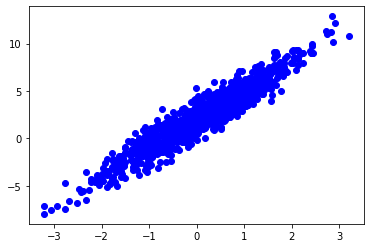

In [44]:
import matplotlib.pyplot as plt
plt.scatter(x, y, c="b")
plt.show()

In [45]:
class MyModel(tf.Module):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.w = tf.Variable(5.0)
        self.b = tf.Variable(0.0)
    def __call__(self, x):
        return self.w * x + self.b
model = MyModel()
print("Variables:", model.variables)
assert model(3.0).numpy() == 15.0

Variables: (<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>)


In [46]:
def loss(target_y, predicted_y):
    return tf.reduce_mean(tf.square(target_y - predicted_y))

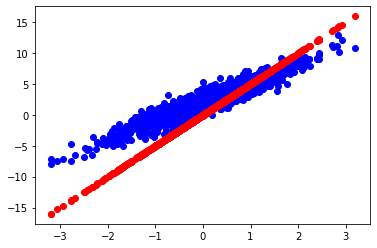

Current loss: 9.409860


In [47]:
plt.scatter(x, y, c="b")
plt.scatter(x, model(x), c="r")
plt.show()
print("Current loss: %1.6f"%loss(y, model(x)).numpy())

In [48]:
def train(model, x, y, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(y, model(x))
    dw, db = t.gradient(current_loss, [model.w, model.b])
    model.w.assign_sub(learning_rate * dw)
    model.b.assign_sub(learning_rate * db)

In [51]:
model = MyModel()
Ws, bs = [], []
epochs = range(10)
def training_loop(model, x, y):
    for epoch in epochs:
        train(model, x, y, learning_rate=0.1)
        Ws.append(model.w.numpy())
        bs.append(model.b.numpy())
        current_loss = loss(y, model(x))
        print("Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f"%(epoch, Ws[-1], bs[-1], current_loss))

Starting: W=5.00 b=0.00, loss=9.40986
Epoch  0: W=4.57 b=0.40, loss=6.30993
Epoch  1: W=4.23 b=0.72, loss=4.35285
Epoch  2: W=3.96 b=0.98, loss=3.11682
Epoch  3: W=3.75 b=1.19, loss=2.33590
Epoch  4: W=3.59 b=1.35, loss=1.84233
Epoch  5: W=3.46 b=1.49, loss=1.53027
Epoch  6: W=3.36 b=1.59, loss=1.33290
Epoch  7: W=3.27 b=1.68, loss=1.20803
Epoch  8: W=3.21 b=1.75, loss=1.12899
Epoch  9: W=3.16 b=1.80, loss=1.07895


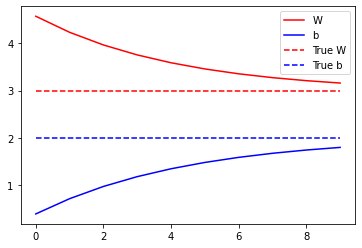

In [52]:
print("Starting: W=%1.2f b=%1.2f, loss=%2.5f"%(model.w, model.b, loss(y, model(x))))
training_loop(model, x, y)
plt.plot(epochs, Ws, 'r', epochs, bs, "b")
plt.plot([TRUE_W] * len(epochs), "r--", [TRUE_B] * len(epochs), "b--")
plt.legend(["W", "b", "True W", "True b"])
plt.show()

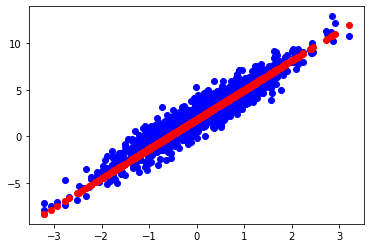

Current loss: 1.078951


In [53]:
plt.scatter(x, y, c="b")
plt.scatter(x, model(x), c="r")
plt.show()
print("Current loss: %1.6f"%loss(model(x), y).numpy())

In [54]:
class MyModelKeras(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.w = tf.Variable(5.0)
        self.b = tf.Variable(0.0)
    def call(self, x):
        return self.w * x + self.b
keras_model = MyModelKeras()
training_loop(keras_model, x, y)
keras_model.save_weights("my_checkpoint")

Epoch  0: W=4.57 b=0.40, loss=6.30993
Epoch  1: W=4.23 b=0.72, loss=4.35285
Epoch  2: W=3.96 b=0.98, loss=3.11682
Epoch  3: W=3.75 b=1.19, loss=2.33590
Epoch  4: W=3.59 b=1.35, loss=1.84233
Epoch  5: W=3.46 b=1.49, loss=1.53027
Epoch  6: W=3.36 b=1.59, loss=1.33290
Epoch  7: W=3.27 b=1.68, loss=1.20803
Epoch  8: W=3.21 b=1.75, loss=1.12899
Epoch  9: W=3.16 b=1.80, loss=1.07895


In [55]:
keras_model = MyModelKeras()
keras_model.compile(run_eagerly = False, optimizer = tf.keras.optimizers.SGD(learning_rate=0.1), loss = tf.keras.losses.
                    mean_squared_error)

In [57]:
print(x.shape[0])
keras_model.fit(x, y, epochs=10, batch_size=1000)

1000
Epoch 1/10
1/1 [==============================] - 0s 275ms/step - loss: 9.4099
Epoch 2/10
1/1 [==============================] - 0s 11ms/step - loss: 6.3099
Epoch 3/10
1/1 [==============================] - 0s 2ms/step - loss: 4.3528
Epoch 4/10
1/1 [==============================] - 0s 2ms/step - loss: 3.1168
Epoch 5/10
1/1 [==============================] - 0s 3ms/step - loss: 2.3359
Epoch 6/10
1/1 [==============================] - 0s 2ms/step - loss: 1.8423
Epoch 7/10
1/1 [==============================] - 0s 4ms/step - loss: 1.5303
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 1.3329
Epoch 9/10
1/1 [==============================] - 0s 2ms/step - loss: 1.2080
Epoch 10/10
1/1 [==============================] - 0s 4ms/step - loss: 1.1290


## Advanced Automatic Differentiation

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["figure.figsize"] = (8, 6)

In [3]:
x = tf.Variable(2.0)
y = tf.Variable(3.0)
with tf.GradientTape() as t:
    x_sq = x * x
    with t.stop_recording():
        y_sq = y * y
    z = x_sq + y_sq
grad = t.gradient(z, {'x':x, 'y':y})
print('dz/dx', grad['x'])
print('dz/dy', grad['y'])

dz/dx tf.Tensor(4.0, shape=(), dtype=float32)
dz/dy None


In [4]:
x = tf.Variable(2.0)
y = tf.Variable(3.0)
reset= True
with tf.GradientTape() as t:
    y_sq = y * y
    if reset:
        t.reset
    z = x * x + y_sq
grad = t.gradient(z, {'x': x, 'y': y})
print('dz.dx', grad['x'])
print("dz/dy", grad['y'])

dz.dx tf.Tensor(4.0, shape=(), dtype=float32)
dz/dy tf.Tensor(6.0, shape=(), dtype=float32)


In [16]:
x0 = tf.constant(0.0)
x1 = tf.constant(0.0)
with tf.GradientTape() as tape0, tf.GradientTape() as tape1:
    tape0.watch(x0)
    tape1.watch(x1)
    y0 = tf.math.sin(x0)
    y1 = tf.nn.sigmoid(x1)
    y = y0 + y1
    ys = tf.reduce_sum(y)

In [17]:
tape0.gradient(ys, x0).numpy()

1.0

In [18]:
tape1.gradient(ys, x1).numpy()

0.25

In [19]:
x = tf.Variable(1.0)
with tf.GradientTape() as t2:
    with tf.GradientTape() as t1:
        y = x * x * x
    dy_dx = t1.gradient(y, x)
d2y_dx2 = t2.gradient(dy_dx, x)
print('dy_dx', dy_dx.numpy())
print('d2x_dx2', d2y_dx2.numpy())

dy_dx 3.0
d2x_dx2 6.0


In [20]:
x = tf.random.normal([7, 5])
layer = tf.keras.layers.Dense(10, activation=tf.nn.relu)

In [21]:
with tf.GradientTape() as t2:
    with tf.GradientTape(watch_accessed_variables=False) as t1:
        t1.watch(x)
        y = layer(x)
        out = tf.reduce_sum(layer(x) ** 2)
    g1 = t1.gradient(out, x)
    g1_mag = tf.norm(g1)
dg1_mag = t2.gradient(g1_mag, layer.trainable_variables)

In [22]:
[var.shape for var in dg1_mag]

[TensorShape([5, 10]), TensorShape([10])]

## Jacobian

In [24]:
x = tf.linspace(-10.0, 10.0, 200 + 1)
delta = tf.Variable(0.0)
with tf.GradientTape() as tape:
    y = tf.nn.sigmoid(x+delta)
dy_dx = tape.jacobian(y, delta)

In [25]:
print(y.shape)
print(dy_dx.shape)

(201,)
(201,)


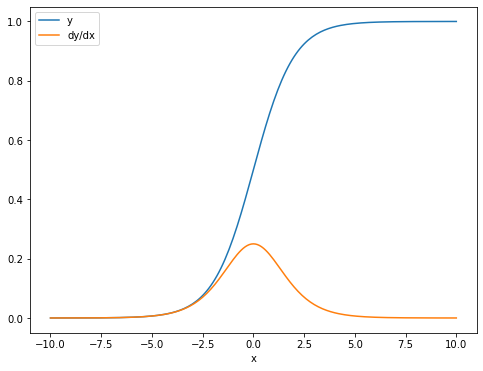

In [28]:
plt.plot(x.numpy(), y, label='y')
plt.plot(x.numpy(), dy_dx, label='dy/dx')
plt.legend()
_ = plt.xlabel('x')

In [29]:
x = tf.random.normal([7, 5])
layer = tf.keras.layers.Dense(10, activation=tf.nn.relu)
with tf.GradientTape(persistent=True) as tape:
    y = layer(x)
y.shape

TensorShape([7, 10])

In [30]:
layer.kernel.shape

TensorShape([5, 10])

In [31]:
j = tape.jacobian(y, layer.kernel)
j.shape

TensorShape([7, 10, 5, 10])

In [32]:
g = tape.gradient(y, layer.kernel)
print('g.shape', g.shape)
j_sum = tf.reduce_sum(j, axis=[0, 1])
delta = tf.reduce_max(abs(g - j_sum)).numpy()
assert delta < 1e-3
print('delta', delta)

g.shape (5, 10)
delta 0.0


In [33]:
x = tf.random.normal([7, 5])
layer1 = tf.keras.layers.Dense(8, activation=tf.nn.relu)
layer2 = tf.keras.layers.Dense(6, activation=tf.nn.relu)
with tf.GradientTape() as t2:
    with tf.GradientTape() as t1:
        x = layer1(x)
        x = layer2(x)
        loss = tf.reduce_mean(x**2)
    g = t1.gradient(loss, layer1.kernel)
h = t2.jacobian(g, layer1.kernel)

In [34]:
print(f"layer.kernel.shape: {layer1.kernel.shape}")
print(f"h.shape: {h.shape}")

layer.kernel.shape: (5, 8)
h.shape: (5, 8, 5, 8)


In [36]:
n_params = tf.reduce_prod(layer1.kernel.shape)
g_vec = tf.reshape(g, [n_params, 1])
h_mat = tf.reshape(h, [n_params, n_params])

In [37]:
def imshow_zero_center(image, **kwargs):
    lim = tf.reduce_max(abs(image))
    plt.imshow(image, vmin=-lim, vmax=lim, cmap="seismic", **kwargs)
    plt.colorbar()

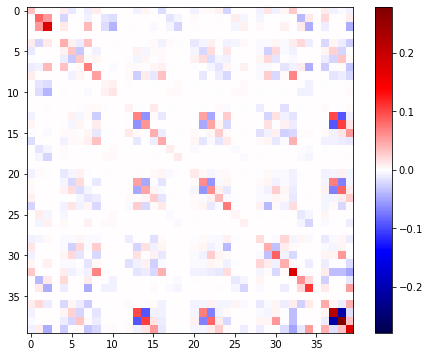

In [38]:
imshow_zero_center(h_mat)

In [39]:
eps = 1e-3
eye_eps = tf.eye(h_mat.shape[0]) * eps

In [41]:
update = tf.linalg.solve(h_mat + eye_eps, g_vec)
_ = layer1.kernel.assign_sub(tf.reshape(update, layer1.kernel.shape))

In [44]:
x = tf.random.normal([7, 5])
layer1 = tf.keras.layers.Dense(8, activation=tf.nn.relu)
layer2 = tf.keras.layers.Dense(6, activation=tf.nn.relu)
with tf.GradientTape(persistent=True, watch_accessed_variables=False) as tape:
    tape.watch(x)
    y = layer1(x)
    y = layer2(y)
y.shape

TensorShape([7, 6])

In [45]:
j = tape.jacobian(y, x)
j.shape

TensorShape([7, 6, 7, 5])

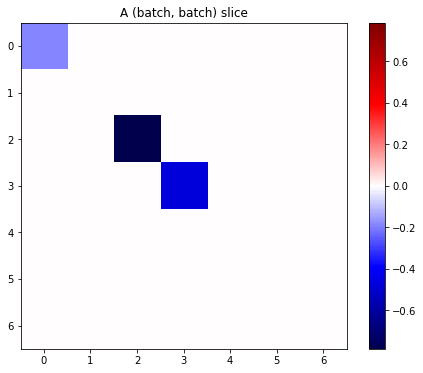

In [47]:
imshow_zero_center(j[:, 0, :, 0])
_ = plt.title('A (batch, batch) slice')

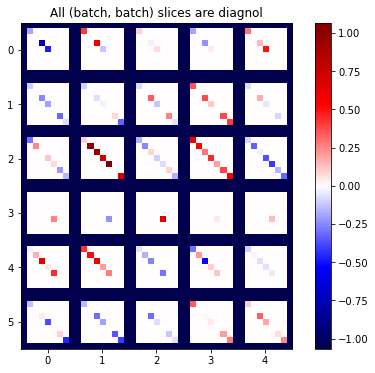

In [49]:
def plot_as_patches(j):
    j = tf.transpose(j, [1, 0, 3, 2])
    lim = tf.reduce_max(abs(j))
    j = tf.pad(j, [[0, 0], [1, 1], [0, 0], [1, 1]], constant_values=-lim)
    s = j.shape
    j = tf.reshape(j, [s[0] * s[1], s[2] * s[3]])
    imshow_zero_center(j, extent=[-0.5, s[2] - 0.5, s[0] - 0.5, -0.5])
plot_as_patches(j)
_ = plt.title('All (batch, batch) slices are diagnol')

In [50]:
j_sum = tf.reduce_sum(j, axis=2)
print(j_sum.shape)
j_select = tf.einsum('bxby->bxy', j)
print(j_select.shape)

(7, 6, 5)
(7, 6, 5)


In [52]:
jb = tape.batch_jacobian(y, x)
jb.shape

TensorShape([7, 6, 5])

In [53]:
error = tf.reduce_max(abs(jb - j_sum))
assert error < 1e-3
print(error.numpy())

0.0


In [56]:
x =tf.random.normal([7, 5])
layer1 = tf.keras.layers.Dense(8, activation=tf.nn.relu)
bn = tf.keras.layers.BatchNormalization()
layer2 = tf.keras.layers.Dense(6, activation=tf.nn.relu)
with tf.GradientTape(persistent=True, watch_accessed_variables=False) as tape:
    tape.watch(x)
    y = layer1(x)
    y = bn(y, training=True)
    y = layer2(y)
j = tape.jacobian(y, x)
print(f"j.shape: {j.shape}")

j.shape: (7, 6, 7, 5)


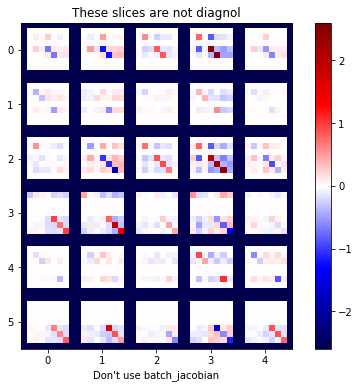

In [57]:
plot_as_patches(j)
_ = plt.title("These slices are not diagnol")
_ = plt.xlabel("Don't use batch_jacobian")

In [58]:
jb = tape.batch_jacobian(y, x)
print(f"jb.shape: {jb.shape}")

jb.shape: (7, 6, 5)


## Ragged tensors

In [1]:
import math
import tensorflow as tf

In [61]:
digits = tf.ragged.constant([[3, 1, 4, 1], [], [5, 9, 2], [6], []])
words = tf.ragged.constant([["So", "long"], ["thanks", "for", "all", "the", "fish"]])
print(tf.add(digits, 3))
print(tf.reduce_mean(digits, axis=1))
print(tf.concat([digits, [[5, 3]]], axis=0))
print(tf.tile(digits, [1, 2]))
print(tf.strings.substr(words, 0, 2))
print(tf.map_fn(tf.math.square, digits))

<tf.RaggedTensor [[6, 4, 7, 4], [], [8, 12, 5], [9], []]>
tf.Tensor([2.25              nan 5.33333333 6.                nan], shape=(5,), dtype=float64)
<tf.RaggedTensor [[3, 1, 4, 1], [], [5, 9, 2], [6], [], [5, 3]]>
<tf.RaggedTensor [[3, 1, 4, 1, 3, 1, 4, 1], [], [5, 9, 2, 5, 9, 2], [6, 6], []]>
<tf.RaggedTensor [[b'So', b'lo'], [b'th', b'fo', b'al', b'th', b'fi']]>
<tf.RaggedTensor [[9, 1, 16, 1], [], [25, 81, 4], [36], []]>


In [62]:
print(digits[0])

tf.Tensor([3 1 4 1], shape=(4,), dtype=int32)


In [63]:
print(digits[:, :2])

<tf.RaggedTensor [[3, 1], [], [5, 9], [6], []]>


In [64]:
print(digits[:, -2:])

<tf.RaggedTensor [[4, 1], [], [9, 2], [6], []]>


In [65]:
print(digits + 3)

<tf.RaggedTensor [[6, 4, 7, 4], [], [8, 12, 5], [9], []]>


In [66]:
print(digits + tf.ragged.constant([[1, 2, 3, 4], [], [5, 6, 7], [8], []]))

<tf.RaggedTensor [[4, 3, 7, 5], [], [10, 15, 9], [14], []]>


In [67]:
times_two_plus_one = lambda x: x * 2 + 1
print(tf.ragged.map_flat_values(times_two_plus_one, digits))

<tf.RaggedTensor [[7, 3, 9, 3], [], [11, 19, 5], [13], []]>


In [68]:
digits.to_list()

[[3, 1, 4, 1], [], [5, 9, 2], [6], []]

In [69]:
digits.numpy()

C:\Users\jatin\anaconda3\lib\site-packages\tensorflow\python\ops\ragged\ragged_tensor.py:2063: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(rows)


array([array([3, 1, 4, 1]), array([], dtype=int32), array([5, 9, 2]),
       array([6]), array([], dtype=int32)], dtype=object)

In [70]:
sentences = tf.ragged.constant([
    ["Lets", "build", "some", "ragged", "tensors", "!"],["We", "can" "use", "tf.ragged.constant", "."]
])
print(sentences)

<tf.RaggedTensor [[b'Lets', b'build', b'some', b'ragged', b'tensors', b'!'], [b'We', b'canuse', b'tf.ragged.constant', b'.']]>


In [71]:
paragraphs = tf.ragged.constant([
    [["I", "have", "a", "cat"], ["His", "name", "is", "Mat"]],
    [["Do", "you", "want", "to", "come", "visit"], ["I'm", "free", "tomorrow"]]
])
print(paragraphs)

<tf.RaggedTensor [[[b'I', b'have', b'a', b'cat'], [b'His', b'name', b'is', b'Mat']], [[b'Do', b'you', b'want', b'to', b'come', b'visit'], [b"I'm", b'free', b'tomorrow']]]>


In [72]:
print(tf.RaggedTensor.from_value_rowids(values=[3, 1, 4, 1, 5, 9, 2], value_rowids=[0, 0, 0, 0, 2, 2, 3]))

<tf.RaggedTensor [[3, 1, 4, 1], [], [5, 9], [2]]>


In [74]:
print(tf.RaggedTensor.from_row_lengths(values=[3, 1, 4, 1, 5, 9, 2], row_lengths=[4, 0, 2, 1]))

<tf.RaggedTensor [[3, 1, 4, 1], [], [5, 9], [2]]>


In [75]:
print(tf.RaggedTensor.from_row_splits(values=[3, 1, 4, 1, 5, 9, 2], row_splits=[0, 4, 4, 6, 7]))

<tf.RaggedTensor [[3, 1, 4, 1], [], [5, 9], [2]]>


In [76]:
print(tf.ragged.constant([["Hi"], ["How", "are" ,"you"]]))

<tf.RaggedTensor [[b'Hi'], [b'How', b'are', b'you']]>


In [77]:
print(tf.ragged.constant([[[1, 2], [3]], [[4, 5]]]))

<tf.RaggedTensor [[[1, 2], [3]], [[4, 5]]]>


In [78]:
try:
    tf.ragged.constant([["one", "two"], [3, 4]])
except ValueError as exception:
    print(exception)

Can't convert Python sequence with mixed types to Tensor.


In [79]:
try:
    tf.ragged.constant(["A", ["B", "C"]])
except ValueError as exception:
    print(exception)

all scalar values must have the same nesting depth


In [3]:
queries = tf.ragged.constant([["Who", "is", "Dan", "Smith"], ["Pause"], ["Will", "it", "rain", "later", "today"]])
num_buckets = 1024
embedding_size = 4
embedding_table = tf.Variable(tf.random.truncated_normal([num_buckets, embedding_size], stddev = 1.0 /
                                                         math.sqrt(embedding_size)))
word_buckets = tf.strings.to_hash_bucket_fast(queries, num_buckets)
word_embeddings = tf.nn.embedding_lookup(embedding_table, word_buckets)

marker = tf.fill([queries.nrows(), 1], "#")
padded = tf.concat([marker, queries, marker], axis=1)

bigrams = tf.strings.join([padded[:, :-1], padded[:, 1:]], separator='+')

bigram_buckets = tf.strings.to_hash_bucket_fast(bigrams, num_buckets)
bigram_embeddings = tf.nn.embedding_lookup(embedding_table, bigram_buckets)

all_embeddings = tf.concat([word_embeddings, bigram_embeddings], axis=1)
avg_embedding = tf.reduce_mean(all_embeddings, axis=1)
print(avg_embedding)

tf.Tensor(
[[ 0.19178537  0.05978698 -0.04191356 -0.36220893]
 [ 0.30287543  0.23408836  0.33339205  0.15856706]
 [ 0.00288609  0.01098812  0.02827347 -0.01242624]], shape=(3, 4), dtype=float32)


In [2]:
import tensorflow as tf
tf.ragged.constant([["Hi"], ["How", "are", "you"]]).shape

TensorShape([2, None])

In [3]:
print(tf.ragged.constant([["Hi"], ["How", "are", "you"]]).bounding_shape())

tf.Tensor([2 3], shape=(2,), dtype=int64)


In [4]:
ragged_x = tf.ragged.constant([["John"], ["a", "big", "dog"], ["my", "cat"]])
ragged_y = tf.ragged.constant([["fell", "asleep"], ["barked"], ["is", "fuzzy"]])
print(tf.concat([ragged_x, ragged_y], axis=1))

<tf.RaggedTensor [[b'John', b'fell', b'asleep'], [b'a', b'big', b'dog', b'barked'], [b'my', b'cat', b'is', b'fuzzy']]>


In [5]:
sparse_x = ragged_x.to_sparse()
sparse_y = ragged_y.to_sparse()
sparse_result = tf.sparse.concat(sp_inputs=[sparse_x, sparse_y], axis=1)
print(tf.sparse.to_dense(sparse_result, ''))

tf.Tensor(
[[b'John' b'' b'' b'fell' b'asleep']
 [b'a' b'big' b'dog' b'barked' b'']
 [b'my' b'cat' b'' b'is' b'fuzzy']], shape=(3, 5), dtype=string)


In [10]:
sentences = tf.constant(['What makes you think she is a witch?', 'She turned me into a newt.', 'A newt?',
                         'well, I got better'])
is_question = tf.constant([True, False, True, False])

hash_buckets = 1000
words = tf.strings.split(sentences, ' ')
hashed_words = tf.strings.to_hash_bucket_fast(words, hash_buckets)

keras_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[None], dtype=tf.int64, ragged=True),
    tf.keras.layers.Embedding(hash_buckets, 16),
    tf.keras.layers.LSTM(32, use_bias=False),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Activation(tf.nn.relu),
    tf.keras.layers.Dense(1)
])
keras_model.compile(loss='binary_crossentropy', optimizer="rmsprop")
keras_model.fit(hashed_words, is_question, epochs=5)
print(keras_model.predict(hashed_words))

Epoch 1/5


C:\Users\jatin\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:447: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/lstm/RaggedToTensor/boolean_mask_1/GatherV2:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/lstm/RaggedToTensor/boolean_mask/GatherV2:0", shape=(None, 16), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/lstm/RaggedToTensor/Shape:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


1/1 [==============================] - 4s 4s/step - loss: 5.5824
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 2.4634
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 2.1879
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 2.0931
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 2.0347
[[0.02200735]
 [0.00711881]
 [0.01628245]
 [0.00250408]]


In [5]:
import google.protobuf.text_format as pbtext
def build_tf_example(s):
    return pbtext.Merge(s, tf.train.Example()).SerializeToString()
example_batch = [
    build_tf_example(r'''
    features{
    feature {key: "colors" value {bytes_list {value: ["red", "blue"]}}}
    feature {key: "lengths" value {int64_list {value: [7]}}}
    }'''),
    build_tf_example(r'''
    features{
    feature {key: "colors" value {bytes_list {value: ["orange"]}}}
    feature {key: "lengths" value {int64_list {value: []}}}
    }'''),
    build_tf_example(r'''
    features{
    feature {key: "colors" value {bytes_list {value: ["black", "yellow"]}}}
    feature {key: "lengths" value {int64_list {value: [1, 3]}}}
    }'''),
    build_tf_example(r'''
    features{
    feature {key: "colors" value {bytes_list {value: ["green"]}}}
    feature {key: "lengths" value {int64_list {value: [3, 5, 2]}}}
    }''')
]

In [6]:
feature_specification = {
    'colors': tf.io.RaggedFeature(tf.string),
    'lengths': tf.io.RaggedFeature(tf.int64),
}
feature_tensors = tf.io.parse_example(example_batch, feature_specification)
for name, value in feature_tensors.items():
    print("{} = {}".format(name, value))

colors = <tf.RaggedTensor [[b'red', b'blue'], [b'orange'], [b'black', b'yellow'], [b'green']]>
lengths = <tf.RaggedTensor [[7], [], [1, 3], [3, 5, 2]]>


In [7]:
import tensorflow as tf

In [10]:
def print_dictionary_dataset(dataset):
    for i, element in enumerate(dataset):
        print("Element {}".format(i))
        for (feature_name, feature_value) in element.items():
            print('{:>14} = {}'.format(feature_name, feature_value))

In [11]:
dataset = tf.data.Dataset.from_tensor_slices(feature_tensors)
print_dictionary_dataset(dataset)

Element 0
        colors = [b'red' b'blue']
       lengths = [7]
Element 1
        colors = [b'orange']
       lengths = []
Element 2
        colors = [b'black' b'yellow']
       lengths = [1 3]
Element 3
        colors = [b'green']
       lengths = [3 5 2]


In [13]:
batched_dataset = dataset.batch(2)
print_dictionary_dataset(batched_dataset)

Element 0
        colors = <tf.RaggedTensor [[b'red', b'blue'], [b'orange']]>
       lengths = <tf.RaggedTensor [[7], []]>
Element 1
        colors = <tf.RaggedTensor [[b'black', b'yellow'], [b'green']]>
       lengths = <tf.RaggedTensor [[1, 3], [3, 5, 2]]>


In [15]:
unbatched_dataset = batched_dataset.unbatch()
print_dictionary_dataset(unbatched_dataset)

Element 0
        colors = [b'red' b'blue']
       lengths = [7]
Element 1
        colors = [b'orange']
       lengths = []
Element 2
        colors = [b'black' b'yellow']
       lengths = [1 3]
Element 3
        colors = [b'green']
       lengths = [3 5 2]


In [16]:
non_ragged_dataset = tf.data.Dataset.from_tensor_slices([1, 5, 3, 2, 8])
non_ragged_dataset = non_ragged_dataset.map(tf.range)
batched_non_ragged_dataset = non_ragged_dataset.apply(tf.data.experimental.dense_to_ragged_batch(2))
for element in batched_non_ragged_dataset:
    print(element)

<tf.RaggedTensor [[0], [0, 1, 2, 3, 4]]>
<tf.RaggedTensor [[0, 1, 2], [0, 1]]>
<tf.RaggedTensor [[0, 1, 2, 3, 4, 5, 6, 7]]>


In [18]:
def transform_lengths(features):
    return {"mean_length": tf.math.reduce_mean(features["lengths"]),
           'length_ranges': tf.ragged.range(features['lengths'])}
transformed_dataset = dataset.map(transform_lengths)
print_dictionary_dataset(transformed_dataset)

Element 0
   mean_length = 7
 length_ranges = <tf.RaggedTensor [[0, 1, 2, 3, 4, 5, 6]]>
Element 1
   mean_length = 0
 length_ranges = <tf.RaggedTensor []>
Element 2
   mean_length = 2
 length_ranges = <tf.RaggedTensor [[0], [0, 1, 2]]>
Element 3
   mean_length = 3
 length_ranges = <tf.RaggedTensor [[0, 1, 2], [0, 1, 2, 3, 4], [0, 1]]>


In [19]:
@tf.function
def make_palindrome(x, axis):
    return tf.concat([x, tf.reverse(x, [axis])], axis)

In [20]:
make_palindrome(tf.constant([[1, 2], [3, 4], [5, 6]]), axis=1)

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[1, 2, 2, 1],
       [3, 4, 4, 3],
       [5, 6, 6, 5]])>

In [21]:
@tf.function(input_signature=[tf.RaggedTensorSpec(shape=[None, None], dtype=tf.int32)])
def max_and_min(rt):
    return (tf.math.reduce_max(rt, axis=-1), tf.math.reduce_min(rt, axis=-1))
max_and_min(tf.ragged.constant([[1, 2], [3], [4, 5, 6]]))

(<tf.Tensor: shape=(3,), dtype=int32, numpy=array([2, 3, 6])>,
 <tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 3, 4])>)

In [22]:
@tf.function
def increment(x):
    return x + 1
rt = tf.ragged.constant([[1, 2], [3], [4, 5, 6]])
cf = increment.get_concrete_function(rt)
print(cf(rt))

<tf.RaggedTensor [[2, 3], [4], [5, 6, 7]]>


In [23]:
import tempfile
keras_module_path = tempfile.mkdtemp()
tf.saved_model.save(keras_model, keras_module_path)
imported_model = tf.saved_model.load(keras_module_path)
imported_model(hashed_words)

NameError: name 'keras_model' is not defined

In [24]:
class CustomModule(tf.Module):
    def __init__(self, variable_value):
        super(CustomModule, self).__init__()
        self.v = tf.Variable(variable_value)
    
    @tf.function
    def grow(self, x):
        return x * self.v

module = CustomModule(100.0)
module.grow.get_concrete_function(tf.RaggedTensorSpec(shape=[None, None], dtype=tf.float32))
custom_module_path = tempfile.mkdtemp()
tf.saved_model.save(module, custom_module_path)
imported_model = tf.saved_model.load(custom_module_path)
imported_model.grow(tf.ragged.constant([[1.0, 4.0, 3.0], [2.0]]))

INFO:tensorflow:Assets written to: C:\Users\jatin\AppData\Local\Temp\tmpkmc0mm7c\assets


<tf.RaggedTensor [[100.0, 400.0, 300.0], [200.0]]>

In [25]:
x = tf.ragged.constant([[1, 2], [3], [4, 5, 6]])
y = tf.ragged.constant([[1, 1], [2], [3, 3, 3]])
print(x + y)

<tf.RaggedTensor [[2, 3], [5], [7, 8, 9]]>


In [26]:
x = tf.ragged.constant([[1, 2], [3], [4, 5, 6]])
print(x + 3)

<tf.RaggedTensor [[4, 5], [6], [7, 8, 9]]>


In [27]:
queries = tf.ragged.constant([["who", "is", "George", "Washington"], 
                             ["What", "is", "the", "weather", "tomorrow"],
                             ["Goodnight"]])

In [28]:
print(queries[1])

tf.Tensor([b'What' b'is' b'the' b'weather' b'tomorrow'], shape=(5,), dtype=string)


In [29]:
print(queries[1, 2])

tf.Tensor(b'the', shape=(), dtype=string)


In [30]:
print(queries[1:])

<tf.RaggedTensor [[b'What', b'is', b'the', b'weather', b'tomorrow'], [b'Goodnight']]>


In [31]:
print(queries[:, :3])

<tf.RaggedTensor [[b'who', b'is', b'George'], [b'What', b'is', b'the'], [b'Goodnight']]>


In [32]:
print(queries[:, -2:])

<tf.RaggedTensor [[b'George', b'Washington'], [b'weather', b'tomorrow'], [b'Goodnight']]>


In [33]:
rt = tf.ragged.constant([[[1, 2, 3], [4]], [[5], [] ,[6]], [[7]], [[8, 9], [10]]])
print(rt[1])

<tf.RaggedTensor [[5], [], [6]]>


In [34]:
print(rt[:, 1:3])

<tf.RaggedTensor [[[4]], [[], [6]], [], [[10]]]>


In [35]:
print(rt[:, -1:])

<tf.RaggedTensor [[[4]], [[6]], [[7]], [[10]]]>


In [36]:
ragged_sentences = tf.ragged.constant([["Hi"], ["Welcome", "to", "the", "fair"], ["Have", "fun"]])
print(ragged_sentences.to_tensor(default_value='', shape=[None, 10]))

tf.Tensor(
[[b'Hi' b'' b'' b'' b'' b'' b'' b'' b'' b'']
 [b'Welcome' b'to' b'the' b'fair' b'' b'' b'' b'' b'' b'']
 [b'Have' b'fun' b'' b'' b'' b'' b'' b'' b'' b'']], shape=(3, 10), dtype=string)


In [37]:
x = [[1, 3, -1, -1], [2, -1, -1, -1], [4, 5, 8, 9]]
print(tf.RaggedTensor.from_tensor(x, padding=-1))

<tf.RaggedTensor [[1, 3], [2], [4, 5, 8, 9]]>


In [39]:
print(ragged_sentences.to_sparse())

SparseTensor(indices=tf.Tensor(
[[0 0]
 [1 0]
 [1 1]
 [1 2]
 [1 3]
 [2 0]
 [2 1]], shape=(7, 2), dtype=int64), values=tf.Tensor([b'Hi' b'Welcome' b'to' b'the' b'fair' b'Have' b'fun'], shape=(7,), dtype=string), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [42]:
st = tf.SparseTensor(indices=[[0, 0], [2, 0], [2, 1]], values=['a', 'b', 'c'], dense_shape=[3, 3])
print(tf.RaggedTensor.from_sparse(st))

<tf.RaggedTensor [[b'a'], [], [b'b', b'c']]>


In [43]:
rt = tf.ragged.constant([[1, 2], [3, 4, 5], [6], [], [7]])
print("Python list:", rt.to_list())
print("Numpy array:", rt.numpy())
print("Values:", rt.values.numpy())
print("Splits:", rt.row_splits.numpy())
print("Indexed value:", rt[1].numpy())

Python list: [[1, 2], [3, 4, 5], [6], [], [7]]
Numpy array: [array([1, 2]) array([3, 4, 5]) array([6]) array([], dtype=int32)
 array([7])]
Values: [1 2 3 4 5 6 7]
Splits: [0 2 5 6 6 7]
Indexed value: [3 4 5]


C:\Users\jatin\anaconda3\lib\site-packages\tensorflow\python\ops\ragged\ragged_tensor.py:2063: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(rows)


In [44]:
x = tf.ragged.constant([[1, 2], [3]])
y = 3
print(x + y)

<tf.RaggedTensor [[4, 5], [6]]>


In [46]:
x = tf.ragged.constant([
    [10, 87, 12],
    [19, 53],
    [12, 32]
])
y = [[1000], [2000], [3000]]
print(x + y)

<tf.RaggedTensor [[1010, 1087, 1012], [2019, 2053], [3012, 3032]]>


In [48]:
x = tf.ragged.constant([
    [[1, 2], [3, 4], [5, 6]],
    [[7, 8]]
], ragged_rank=1)
y = tf.constant([[10]])
print(x + y)

<tf.RaggedTensor [[[11, 12], [13, 14], [15, 16]], [[17, 18]]]>


In [49]:
x = tf.ragged.constant([
    [
        [[1], [2]],
        [],
        [[3]],
        [[4]]
    ],
    [
        [[5], [6]],
        [[7]]
    ]
], ragged_rank=2)
y = tf.constant([10, 20, 30])
print(x + y)

<tf.RaggedTensor [[[[11, 21, 31], [12, 22, 32]], [], [[13, 23, 33]], [[14, 24, 34]]], [[[15, 25, 35], [16, 26, 36]], [[17, 27, 37]]]]>


In [50]:
x = tf.ragged.constant([[1, 2], [3, 4, 5, 6], [7]])
y = tf.constant([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
try:
    x + y
except tf.errors.InvalidArgumentError as exception:
    print(exception)

Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'Unable to broadcast: dimension size mismatch in dimension'
1
b'lengths='
4
b'dim_size='
2, 4, 1


In [51]:
x = tf.ragged.constant([[1, 2, 3], [4], [5, 6]])
y = tf.ragged.constant([[10, 20], [30, 40], [50]])
try:
    x + y
except tf.errors.InvalidArgumentError as exception:
    print(exception)

Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'Unable to broadcast: dimension size mismatch in dimension'
1
b'lengths='
2, 2, 1
b'dim_size='
3, 1, 2


In [53]:
rt = tf.RaggedTensor.from_row_splits(values=[3, 1, 4, 1, 5, 9, 2], row_splits=[0, 4, 4, 5, 6, 7])
print(rt)

<tf.RaggedTensor [[3, 1, 4, 1], [], [5], [9], [2]]>


In [55]:
rt = tf.RaggedTensor.from_row_splits(values=tf.RaggedTensor.from_row_splits(values=[10, 11, 12, 13, 1, 15, 16, 17, 18, 19],
                                                                           row_splits=[0, 3, 3, 5, 9, 10]), 
                                     row_splits=[0, 1, 1, 5])
print(rt)
print("Shape: {}".format(rt.shape))
print("Number of partitioned dimensions: {}".format(rt.ragged_rank))

<tf.RaggedTensor [[[10, 11, 12]], [], [[], [13, 1], [15, 16, 17, 18], [19]]]>
Shape: (3, None, None)
Number of partitioned dimensions: 2


In [56]:
rt = tf.RaggedTensor.from_nested_row_splits(flat_values=[10, 11, 12, 13, 14, 15, 16, 17, 18, 19], nested_row_splits=
                                           ([0, 1, 1, 5], [0, 3, 3, 5, 9, 10]))
print(rt)

<tf.RaggedTensor [[[10, 11, 12]], [], [[], [13, 14], [15, 16, 17, 18], [19]]]>


In [58]:
conversations = tf.ragged.constant([[[["I", "like", "ragged", "tensors."]],
                                    [["oh", "yeah?"], ["What", "can", "you", "use", "them", "for?"]],
                                    [["precessing", "variable", "length", "data!"]]],
                                   [[["I", "like", "cheese"], ["Do", "you?"]], 
                                   [["yes"], ["I", "do"]]]])
conversations.shape

TensorShape([2, None, None, None])

In [60]:
assert conversations.ragged_rank == len(conversations.nested_row_splits)
conversations.ragged_rank

3

In [61]:
conversations.flat_values.numpy()

array([b'I', b'like', b'ragged', b'tensors.', b'oh', b'yeah?', b'What',
       b'can', b'you', b'use', b'them', b'for?', b'precessing',
       b'variable', b'length', b'data!', b'I', b'like', b'cheese', b'Do',
       b'you?', b'yes', b'I', b'do'], dtype=object)

In [64]:
rt = tf.RaggedTensor.from_row_splits(values=[[1, 3], [0, 0], [1, 3], [5, 3], [3, 3], [1, 2]], 
                                    row_splits=[0, 3, 4, 6])
print(rt)
print("Shape: {}".format(rt.shape))
print("Number of partitioned dimension: {}".format(rt.ragged_rank))
print("Flat value shape: {}".format(rt.flat_values.shape))
print("Flat values: \n{}".format(rt.flat_values))

<tf.RaggedTensor [[[1, 3], [0, 0], [1, 3]], [[5, 3]], [[3, 3], [1, 2]]]>
Shape: (3, None, 2)
Number of partitioned dimension: 1
Flat value shape: (6, 2)
Flat values: 
[[1 3]
 [0 0]
 [1 3]
 [5 3]
 [3 3]
 [1 2]]


In [65]:
rt = tf.RaggedTensor.from_uniform_row_length(values=tf.RaggedTensor.
                                             from_row_splits(values=[10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 
                                                             row_splits=[0, 3, 5, 9, 10]), uniform_row_length=2)
print(rt)
print("shape: {}".format(rt.shape))
print("Number of partitioned dimensions: {}".format(rt.ragged_rank))

<tf.RaggedTensor [[[10, 11, 12], [13, 14]], [[15, 16, 17, 18], [19]]]>
shape: (2, 2, None)
Number of partitioned dimensions: 2


# Sparse tensors

In [66]:
import tensorflow as tf

In [67]:
st1 = tf.SparseTensor(indices=[[0, 3], [2, 4]], values=[10, 20], dense_shape=[3, 10])
print(st1)

SparseTensor(indices=tf.Tensor(
[[0 3]
 [2 4]], shape=(2, 2), dtype=int64), values=tf.Tensor([10 20], shape=(2,), dtype=int32), dense_shape=tf.Tensor([ 3 10], shape=(2,), dtype=int64))


In [68]:
def pprint_sparse_tensor(st):
    s = "<SparseTensor shape=%s \n values={" %(st.dense_shape.numpy().tolist())
    for (index, values) in zip(st.indices, st.values):
        s += f"\n %s: %s"%(index.numpy().tolist(), value.numpy().tolist())
    return s + ")>"

In [69]:
print(pprint_sparse_tensor(st1))

<SparseTensor shape=[3, 10] 
 values={
 [0, 3]: [array([7], dtype=int64), array([], dtype=int64), array([1, 3], dtype=int64), array([3, 5, 2], dtype=int64)]
 [2, 4]: [array([7], dtype=int64), array([], dtype=int64), array([1, 3], dtype=int64), array([3, 5, 2], dtype=int64)])>


In [70]:
st2 = tf.sparse.from_dense([[1, 0, 0, 8], [0, 0, 0, 0], [0, 0, 3, 0]])
print(pprint_sparse_tensor(st2))

<SparseTensor shape=[3, 4] 
 values={
 [0, 0]: [array([7], dtype=int64), array([], dtype=int64), array([1, 3], dtype=int64), array([3, 5, 2], dtype=int64)]
 [0, 3]: [array([7], dtype=int64), array([], dtype=int64), array([1, 3], dtype=int64), array([3, 5, 2], dtype=int64)]
 [2, 2]: [array([7], dtype=int64), array([], dtype=int64), array([1, 3], dtype=int64), array([3, 5, 2], dtype=int64)])>


In [71]:
st3 = tf.sparse.to_dense(st2)
print(st3)

tf.Tensor(
[[1 0 0 8]
 [0 0 0 0]
 [0 0 3 0]], shape=(3, 4), dtype=int32)


In [72]:
st_a = tf.SparseTensor(indices=[[0, 2], [3, 4]], values=[31, 2], dense_shape=[4, 10])
st_b = tf.SparseTensor(indices=[[0, 2], [7, 0]], values=[56, 38], dense_shape=[4, 10])
st_sum = tf.sparse.add(st_a, st_b)
print(pprint_sparse_tensor(st_sum))

<SparseTensor shape=[4, 10] 
 values={
 [0, 2]: [array([7], dtype=int64), array([], dtype=int64), array([1, 3], dtype=int64), array([3, 5, 2], dtype=int64)]
 [3, 4]: [array([7], dtype=int64), array([], dtype=int64), array([1, 3], dtype=int64), array([3, 5, 2], dtype=int64)]
 [7, 0]: [array([7], dtype=int64), array([], dtype=int64), array([1, 3], dtype=int64), array([3, 5, 2], dtype=int64)])>


In [73]:
st_c = tf.SparseTensor(indices=([0, 1], [1, 0], [1, 1]), values=[13, 15, 17], dense_shape=(2, 2))
mb = tf.constant([[4], [6]])
product = tf.sparse.sparse_dense_matmul(st_c, mb)
print(product)

tf.Tensor(
[[ 78]
 [162]], shape=(2, 1), dtype=int32)


In [74]:
sparse_pattern_A = tf.SparseTensor(indices=[[2, 4], [3, 3], [3, 4], [4, 3], [4, 4], [5, 4]], 
                                  values = [1, 1, 1, 1, 1, 1], dense_shape=[8, 5])
sparse_pattern_B = tf.SparseTensor(indices=[[0, 2], [1, 1], [1, 3], [2, 0], [2, 4], [2, 5], [3, 5], [4, 5], [5, 0], [5, 4],
                                           [5, 5], [6, 1], [6, 3], [7, 2]], values=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
                                                                                   1], dense_shape=[8, 6])
sparse_pattern_C = tf.SparseTensor(indices=[[3, 0], [4, 0]], values=[1, 1], dense_shape=[8, 6])
sparse_patterns_list = [sparse_pattern_A, sparse_pattern_B, sparse_pattern_C]
sparse_pattern = tf.sparse.concat(axis=1, sp_inputs = sparse_patterns_list)
print(tf.sparse.to_dense(sparse_pattern))

tf.Tensor(
[[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]], shape=(8, 17), dtype=int32)


In [77]:
sparse_slice_A = tf.sparse.slice(sparse_pattern_A, start= [0, 0], size=[8, 5])
sparse_slice_B = tf.sparse.slice(sparse_pattern_B, start=[0, 5], size=[8, 6])
sparse_slice_C = tf.sparse.slice(sparse_pattern_C, start=[0, 10], size=[8, 6])
print(tf.sparse.to_dense(sparse_slice_A))
print(tf.sparse.to_dense(sparse_slice_B))
print(tf.sparse.to_dense(sparse_slice_C))

tf.Tensor(
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 1 1]
 [0 0 0 1 1]
 [0 0 0 0 1]
 [0 0 0 0 0]
 [0 0 0 0 0]], shape=(8, 5), dtype=int32)
tf.Tensor(
[[0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]], shape=(8, 1), dtype=int32)
tf.Tensor([], shape=(8, 0), dtype=int32)


In [78]:
st2_plus_5 = tf.sparse.map_values(tf.add, st2, 5)
print(tf.sparse.to_dense(st2_plus_5))

tf.Tensor(
[[ 6  0  0 13]
 [ 0  0  0  0]
 [ 0  0  8  0]], shape=(3, 4), dtype=int32)


In [79]:
st2_plus_5 = tf.SparseTensor(st2.indices, st2.values + 5, st2.dense_shape)
print(tf.sparse.to_dense(st2_plus_5))

tf.Tensor(
[[ 6  0  0 13]
 [ 0  0  0  0]
 [ 0  0  8  0]], shape=(3, 4), dtype=int32)


In [80]:
x = tf.keras.Input(shape=(4, ), sparse=True)
y = tf.keras.layers.Dense(4)(x)
model = tf.keras.Model(x, y)
sparse_data = tf.SparseTensor(indices=[(0, 0), (0, 1), (0, 2), (4, 3), (5, 0), (5, 1)], values=[1, 1, 1, 1, 1, 1], 
                              dense_shape=(6, 4))
model(sparse_data)
model.predict(sparse_data)

array([[-0.26389676,  0.02144793,  0.9685423 , -0.4658563 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [-0.37645215, -0.6729426 , -0.2136671 ,  0.33973342],
       [-0.7059418 ,  0.47474116,  0.7492155 , -0.6596407 ]],
      dtype=float32)

In [81]:
dataset = tf.data.Dataset.from_tensor_slices(sparse_data)
for element in dataset:
    print(pprint_sparse_tensor(element))

<SparseTensor shape=[4] 
 values={
 [0]: [array([7], dtype=int64), array([], dtype=int64), array([1, 3], dtype=int64), array([3, 5, 2], dtype=int64)]
 [1]: [array([7], dtype=int64), array([], dtype=int64), array([1, 3], dtype=int64), array([3, 5, 2], dtype=int64)]
 [2]: [array([7], dtype=int64), array([], dtype=int64), array([1, 3], dtype=int64), array([3, 5, 2], dtype=int64)])>
<SparseTensor shape=[4] 
 values={)>
<SparseTensor shape=[4] 
 values={)>
<SparseTensor shape=[4] 
 values={)>
<SparseTensor shape=[4] 
 values={
 [3]: [array([7], dtype=int64), array([], dtype=int64), array([1, 3], dtype=int64), array([3, 5, 2], dtype=int64)])>
<SparseTensor shape=[4] 
 values={
 [0]: [array([7], dtype=int64), array([], dtype=int64), array([1, 3], dtype=int64), array([3, 5, 2], dtype=int64)]
 [1]: [array([7], dtype=int64), array([], dtype=int64), array([1, 3], dtype=int64), array([3, 5, 2], dtype=int64)])>


In [82]:
batched_dataset = dataset.batch(2)
for element in batched_dataset:
    print(pprint_sparse_tensor(element))

<SparseTensor shape=[2, 4] 
 values={
 [0, 0]: [array([7], dtype=int64), array([], dtype=int64), array([1, 3], dtype=int64), array([3, 5, 2], dtype=int64)]
 [0, 1]: [array([7], dtype=int64), array([], dtype=int64), array([1, 3], dtype=int64), array([3, 5, 2], dtype=int64)]
 [0, 2]: [array([7], dtype=int64), array([], dtype=int64), array([1, 3], dtype=int64), array([3, 5, 2], dtype=int64)])>
<SparseTensor shape=[2, 4] 
 values={)>
<SparseTensor shape=[2, 4] 
 values={
 [0, 3]: [array([7], dtype=int64), array([], dtype=int64), array([1, 3], dtype=int64), array([3, 5, 2], dtype=int64)]
 [1, 0]: [array([7], dtype=int64), array([], dtype=int64), array([1, 3], dtype=int64), array([3, 5, 2], dtype=int64)]
 [1, 1]: [array([7], dtype=int64), array([], dtype=int64), array([1, 3], dtype=int64), array([3, 5, 2], dtype=int64)])>


In [83]:
unbatched_dataset = batched_dataset.unbatch()
for element in unbatched_dataset:
    print(pprint_sparse_tensor(element))

<SparseTensor shape=[4] 
 values={
 [0]: [array([7], dtype=int64), array([], dtype=int64), array([1, 3], dtype=int64), array([3, 5, 2], dtype=int64)]
 [1]: [array([7], dtype=int64), array([], dtype=int64), array([1, 3], dtype=int64), array([3, 5, 2], dtype=int64)]
 [2]: [array([7], dtype=int64), array([], dtype=int64), array([1, 3], dtype=int64), array([3, 5, 2], dtype=int64)])>
<SparseTensor shape=[4] 
 values={)>
<SparseTensor shape=[4] 
 values={)>
<SparseTensor shape=[4] 
 values={)>
<SparseTensor shape=[4] 
 values={
 [3]: [array([7], dtype=int64), array([], dtype=int64), array([1, 3], dtype=int64), array([3, 5, 2], dtype=int64)])>
<SparseTensor shape=[4] 
 values={
 [0]: [array([7], dtype=int64), array([], dtype=int64), array([1, 3], dtype=int64), array([3, 5, 2], dtype=int64)]
 [1]: [array([7], dtype=int64), array([], dtype=int64), array([1, 3], dtype=int64), array([3, 5, 2], dtype=int64)])>


In [84]:
transform_dataset = dataset.map(lambda x: x * 2)
for i in transform_dataset:
    print(pprint_sparse_tensor(i))

<SparseTensor shape=[4] 
 values={
 [0]: [array([7], dtype=int64), array([], dtype=int64), array([1, 3], dtype=int64), array([3, 5, 2], dtype=int64)]
 [1]: [array([7], dtype=int64), array([], dtype=int64), array([1, 3], dtype=int64), array([3, 5, 2], dtype=int64)]
 [2]: [array([7], dtype=int64), array([], dtype=int64), array([1, 3], dtype=int64), array([3, 5, 2], dtype=int64)])>
<SparseTensor shape=[4] 
 values={)>
<SparseTensor shape=[4] 
 values={)>
<SparseTensor shape=[4] 
 values={)>
<SparseTensor shape=[4] 
 values={
 [3]: [array([7], dtype=int64), array([], dtype=int64), array([1, 3], dtype=int64), array([3, 5, 2], dtype=int64)])>
<SparseTensor shape=[4] 
 values={
 [0]: [array([7], dtype=int64), array([], dtype=int64), array([1, 3], dtype=int64), array([3, 5, 2], dtype=int64)]
 [1]: [array([7], dtype=int64), array([], dtype=int64), array([1, 3], dtype=int64), array([3, 5, 2], dtype=int64)])>


In [85]:
@tf.function
def f(x, y):
    return tf.sparse.sparse_dense_matmul(x, y)

a = tf.SparseTensor(indices=[[0, 3], [2, 4]], values=[15, 25], dense_shape=[3, 10])
b = tf.sparse.to_dense(tf.sparse.transpose(a))
c = f(a, b)
print(c)

tf.Tensor(
[[225   0   0]
 [  0   0   0]
 [  0   0 625]], shape=(3, 3), dtype=int32)


In [86]:
print(tf.sparse.reduce_max(tf.sparse.from_dense([-5, 0, -3])))

tf.Tensor(-3, shape=(), dtype=int32)


In [87]:
print(tf.math.reduce_max([-5, 0, -3]))

tf.Tensor(0, shape=(), dtype=int32)


# Numpy API

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.experimental.numpy as tnp
import timeit
print("Using Tensorflow version %s"%tf.__version__)

Using Tensorflow version 2.6.0


In [2]:
tnp.experimental_enable_numpy_behavior()

In [3]:
ones = tnp.ones([5, 3], dtype=tnp.float32)
print("Created ND array with shape = %s, rank=%s, dtype = %s on device = %s\n" %(ones.shape, ones.ndim, ones.dtype, 
                                                                                 ones.device))
print("Is ones an instance of tf.Tensor: %s\n"%isinstance(ones, tf.Tensor))
print("ndarray.T has shape %s"%str(ones.T.shape))
print("narray.reshape(-1) has shape %s"%ones.reshape(-1).shape)

Created ND array with shape = (5, 3), rank=2, dtype = <dtype: 'float32'> on device = /job:localhost/replica:0/task:0/device:CPU:0

Is ones an instance of tf.Tensor: True

ndarray.T has shape (3, 5)
narray.reshape(-1) has shape (15,)


In [4]:
print("Type promotion for operations")
values = [tnp.asarray(1, dtype=d) for d in (tnp.int32, tnp.int64, tnp.float32, tnp.float64)]
for i, v1 in enumerate(values):
    for v2 in values[i + 1:]:
        print("%s + %s => %s"%(v1.dtype.name, v2.dtype.name, (v1 + v2).dtype.name))

Type promotion for operations
int32 + int64 => int64
int32 + float32 => float64
int32 + float64 => float64
int64 + float32 => float64
int64 + float64 => float64
float32 + float64 => float64


In [5]:
print("type inference during array creation")
print("tnp.asarray(1).dtype == tnp.%s"%tnp.asarray(1).dtype.name)
print("tnp.asarray(1).dtype == tnp.%s\n"%tnp.asarray(1.).dtype.name)

type inference during array creation
tnp.asarray(1).dtype == tnp.int32
tnp.asarray(1).dtype == tnp.float64



In [6]:
tnp.experimental_enable_numpy_behavior(prefer_float32=True)
print("when prefer_float32 is True:")
print("tnp.asarray(1.).dtype == tnp.%s"%tnp.asarray(1.).dtype.name)
print("tnp.add(1., 2.).dtype == tnp.%s"%tnp.add(1., 2.).dtype.name)

tnp.experimental_enable_numpy_behavior(prefer_float32=False)
print("When prefer_float32 is False:")
print("tnp.asarray(1.).dtype == tnp.%s"%tnp.asarray(1.).dtype.name)
print("tnp.add(1., 2.).dtype == tnp.%s"%tnp.add(1., 2.).dtype.name)

when prefer_float32 is True:
tnp.asarray(1.).dtype == tnp.float32
tnp.add(1., 2.).dtype == tnp.float32
When prefer_float32 is False:
tnp.asarray(1.).dtype == tnp.float64
tnp.add(1., 2.).dtype == tnp.float64


In [7]:
x = tnp.ones([2, 3])
y = tnp.ones([3])
z = tnp.ones([1, 2, 1])
print("Broadcasting shapes %s, %s and %s gives shape %s"%(x.shape, y.shape, z.shape, (x + y + z).shape))

Broadcasting shapes (2, 3), (3,) and (1, 2, 1) gives shape (1, 2, 3)


In [8]:
x = tnp.arange(24).reshape(2, 3, 4)
print("Basic indexing")
print(x[1, tnp.newaxis, 1:3, ...], "\n")

print("Boolean indexing")
print(x[:, (True, False, True)], "\n")

print("Advanced indexing")
print(x[1, (0, 0, 1), tnp.asarray([0, 1, 1])])

Basic indexing
tf.Tensor(
[[[16 17 18 19]
  [20 21 22 23]]], shape=(1, 2, 4), dtype=int32) 

Boolean indexing
tf.Tensor(
[[[ 0  1  2  3]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [20 21 22 23]]], shape=(2, 2, 4), dtype=int32) 

Advanced indexing
tf.Tensor([12 13 17], shape=(3,), dtype=int32)


In [10]:
class Model(object):
    def __init__(self):
        self.weights = None
    
    def predict(self, inputs):
        if self.weights is None:
            size = inputs.shape[1]
            stddev = tnp.sqrt(size).astype(tnp.float32)
            w1 = tnp.random.randn(size, 64).astype(tnp.float32) / stddev
            bias = tnp.random.randn(64).astype(tnp.float32)
            w2 = tnp.random.randn(64, 2).astype(tnp.float32) / 8
            self.weights = (w1, bias, w2)
        else:
            w1, bias, w2 = self.weights
        y = tnp.matmul(inputs, w1) + bias
        y = tnp.maximum(y, 0)
        return tnp.matmul(y, w2)

model = Model()
print(model.predict(tnp.ones([2, 32], dtype=tnp.float32)))

tf.Tensor(
[[0.7138346 1.8971399]
 [0.7138346 1.8971399]], shape=(2, 2), dtype=float32)


In [12]:
np_sum = np.sum(tnp.ones([2, 3]))
print("sum = %s. Class: %s"%(float(np_sum), np_sum.__class__))
tnp_sum = tnp.sum(np.ones([2, 3]))
print("sum = %s. Class: %s"%(float(tnp_sum), tnp_sum.__class__))

sum = 6.0. Class: <class 'numpy.float64'>
sum = 6.0. Class: <class 'tensorflow.python.framework.ops.EagerTensor'>


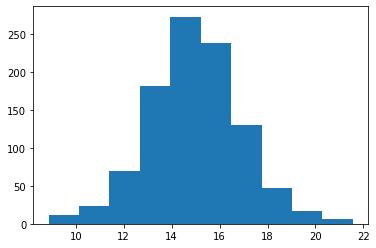

In [13]:
labels = 15 + 2 * tnp.random.randn(1, 1000)
_ = plt.hist(labels)

In [14]:
x = tnp.ones([2]) + np.ones([2])
print("x = %s\nclass = %s"%(x, x.__class__))

x = tf.Tensor([2. 2.], shape=(2,), dtype=float64)
class = <class 'tensorflow.python.framework.ops.EagerTensor'>


In [15]:
x = tf.constant([1, 2])
print(x)

tnp_x = tnp.asarray(x)
print(tnp_x)
print(tf.convert_to_tensor(tnp_x))
print(x.numpy(), x.numpy().__class__)

tf.Tensor([1 2], shape=(2,), dtype=int32)
tf.Tensor([1 2], shape=(2,), dtype=int32)
tf.Tensor([1 2], shape=(2,), dtype=int32)
[1 2] <class 'numpy.ndarray'>


In [16]:
tf_sum = tf.reduce_sum(tnp.ones([2, 3], tnp.float32))
print("Output = %s"%tf_sum)
tnp_sum = tnp.sum(tf.ones([2, 3]))
print("output = %s"%tnp_sum)

Output = tf.Tensor(6.0, shape=(), dtype=float32)
output = tf.Tensor(6.0, shape=(), dtype=float32)


In [17]:
def create_batch(batch_size=32):
    return (tnp.random.randn(batch_size, 32).astype(tnp.float32),
           tnp.random.randn(batch_size, 2).astype(tnp.float32))

def compute_gradients(model, inputs, labels):
    with tf.GradientTape() as tape:
        assert model.weights is not None
        tape.watch(model.weights)
        prediction = model.predict(inputs)
        loss = tnp.sum(tnp.square(prediction - labels))
    return tape.gradient(loss, model.weights)

inputs, labels = create_batch()
gradients = compute_gradients(model, inputs, labels)

print("Parameter shapes:", [w.shape for w in model.weights])
print("Gradient shapes:", [g.shape for g in gradients])
assert isinstance(gradients[0], tnp.ndarray)

Parameter shapes: [TensorShape([32, 64]), TensorShape([64]), TensorShape([64, 2])]
Gradient shapes: [TensorShape([32, 64]), TensorShape([64]), TensorShape([64, 2])]


In [18]:
def prediction_batch_jacobian(inputs):
    with tf.GradientTape() as tape:
        tape.watch(inputs)
        prediction = model.predict(inputs)
    return prediction, tape.batch_jacobian(prediction, inputs)

inp_batch = tnp.ones([16, 32], tnp.float32)
output, batch_jacobian = prediction_batch_jacobian(inp_batch)
print("Output shape: %s, input shape: %s"%(output.shape, inp_batch.shape))
print("Batch jacobian sahpe:", batch_jacobian.shape)

Output shape: (16, 2), input shape: (16, 32)
Batch jacobian sahpe: (16, 2, 32)


In [20]:
inputs, labels = create_batch(512)
print("Eager performance")
compute_gradients(model, inputs, labels)
print(timeit.timeit(lambda: compute_gradients(model, inputs, labels), number=10) * 100, "ms")
print("\ntf.function compiled performance")
compiled_compute_gradients = tf.function(compute_gradients)
compiled_compute_gradients(model, inputs, labels)
print(timeit.timeit(lambda: compiled_compute_gradients(model, inputs, labels), number=10) * 100, "ms")

Eager performance
1.5571000000818458 ms

tf.function compiled performance
0.7509600000048522 ms


In [21]:
@tf.function
def vectorized_per_example_gradients(inputs, labels):
    def single_example_gradient(arg):
        inp, label = arg
        return compute_gradients(model, tnp.expand_dims(inp, 0), tnp.expand_dims(label, 0))
    return tf.vectorized_map(single_example_gradient, (inputs, labels))
batch_size = 128
inputs, labels = create_batch(batch_size)
per_example_gradients = vectorized_per_example_gradients(inputs, labels)
for w, p, in zip(model.weights, per_example_gradients):
    print("Weight shape: %s, batch size: %s, per example gradient shape: %s"%(w.shape, batch_size, p.shape))

Weight shape: (32, 64), batch size: 128, per example gradient shape: (128, 32, 64)
Weight shape: (64,), batch size: 128, per example gradient shape: (128, 64)
Weight shape: (64, 2), batch size: 128, per example gradient shape: (128, 64, 2)


In [23]:
@tf.function
def unvectorized_per_example_gradients(inputs, labels):
    def single_example_gradient(arg):
        inp, label = arg
        return compute_gradients(model, tnp.expand_dims(inp, 0), tnp.expand_dims(label, 0))
    return tf.map_fn(single_example_gradient, (inputs, labels), fn_output_signature = (tf.float32, tf.float32, tf.float32))
print("Running vectorized computation")
print(timeit.timeit(lambda: vectorized_per_example_gradients(inputs, labels), number=10) * 100, "ms")
print("\nRunning unvectorized computation")
per_example_gradients = unvectorized_per_example_gradients(inputs, labels)
print(timeit.timeit(lambda: unvectorized_per_example_gradients(inputs, labels), number = 10) * 100, "ms")

Running vectorized computation
1.0974800000440155 ms

Running unvectorized computation
4.934820000016771 ms


In [24]:
print("All logical devices:", tf.config.list_logical_devices())
print("All physical devices:", tf.config.list_physical_devices())
try:
    device = tf.config.list_logical_devices(device_type="GPU")[0]
except IndexError:
    device = "/device:CPU:0"

All logical devices: [LogicalDevice(name='/device:CPU:0', device_type='CPU')]
All physical devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [25]:
print("Using device: %s"%str(device))
with tf.device(device):
    prediction = model.predict(create_batch(5)[0])
print("prediction is placed on %s"%prediction.device)

Using device: /device:CPU:0
prediction is placed on /job:localhost/replica:0/task:0/device:CPU:0


In [26]:
with tf.device("/device:CPU:0"):
    prediction_cpu = tnp.copy(prediction)
print(prediction.device)
print(prediction_cpu.device)

/job:localhost/replica:0/task:0/device:CPU:0
/job:localhost/replica:0/task:0/device:CPU:0


In [27]:
def benchmark(f, inputs, number=30, force_gpu_sync=False):
    times = []
    for inp in inputs:
        def _g():
            if force_gpu_sync:
                one = tnp.asarray(1)
            f(inp)
            if force_gpu_sync:
                with tf.device("CPU:0"):
                    tnp.copy(one)
        _g()
        t = timeit.timeit(_g, number=number)
        times.append(t * 1000. / number)
    return times

def plot(np_times, tnp_times, compiled_tnp_times, has_gpu, tnp_times_gpu):
    plt.xlabel("size")
    plt.ylabel("time (ms)")
    plt.title("Sigmoid benchmark: TF NumPy vs NumPy")
    plt.plot(sizes, np_times, label="Numpy")
    plt.plot(sizes, tnp_times, label="TF Numpy (CPU)")
    plt.plot(sizes, compiled_tnp_times, label="Compiled TF Numpy (CPU)")
    if has_gpu:
        plt.plot(sizes, tnp_times_gpu, label="TF Numpy (GPU)")
    plt.legend()

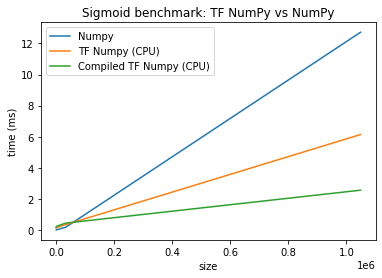

In [29]:
def np_sigmoid(y):
    return 1. / (1. + np.exp(-y))

def tnp_sigmoid(y):
    return 1. / (1. + tnp.exp(-y))
@tf.function
def compiled_tnp_sigmoid(y):
    return tnp_sigmoid(y)
sizes = (2 ** 0, 2 ** 5,  2**10, 2 ** 15, 2 ** 20)
np_inputs = [np.random.randn(size).astype(np.float32) for size in sizes]
np_times = benchmark(np_sigmoid, np_inputs)

with tf.device("/device:CPU:0"):
    tnp_inputs = [tnp.random.randn(size).astype(np.float32) for size in sizes]
    tnp_times = benchmark(tnp_sigmoid, tnp_inputs)
    compiled_tnp_times = benchmark(compiled_tnp_sigmoid, tnp_inputs)
    
has_gpu = len(tf.config.list_logical_devices("GPU"))
if has_gpu:
    with tf.device("/device:GPU:0"):
        tnp_inputs = [tnp.random.randn(size).astype(np.float32) for size in sizes]
        tnp_times_gpu = benchmark(compiled_tnp_sigmoid, tnp_inputs, 100, True)
else:
    tnp_times_gpu = None
plot(np_times, tnp_times, compiled_tnp_times, has_gpu, tnp_times_gpu)

# Introduction to tensor slicing

In [5]:
import tensorflow as tf
import numpy as np
t1 = tf.constant([0, 1, 2, 3, 4, 5, 6, 7])
print(tf.slice(t1, begin=[1], size=[3]))

tf.Tensor([1 2 3], shape=(3,), dtype=int32)


In [6]:
print(t1[1:4])

tf.Tensor([1 2 3], shape=(3,), dtype=int32)


In [7]:
print(t1[-3:])

tf.Tensor([5 6 7], shape=(3,), dtype=int32)


In [8]:
t2 = tf.constant([
    [0, 1, 2, 3, 4],
    [5, 6, 7, 8, 9],
    [10, 11, 12, 13, 14],
    [15, 16, 17, 18, 19]
])
print(t2[:-1, 1:3])

tf.Tensor(
[[ 1  2]
 [ 6  7]
 [11 12]], shape=(3, 2), dtype=int32)


In [10]:
t3 = tf.constant([
    [[1, 3, 5, 7],
    [9, 11, 13, 15]],
    [[17, 19, 21, 23],
    [25, 27, 29, 31]]
])
print(tf.slice(t3, begin=[1, 1, 0], size=[1, 1, 2]))

tf.Tensor([[[25 27]]], shape=(1, 1, 2), dtype=int32)


In [11]:
print(tf.gather(t1, indices=[0, 3, 6]))
t1[::3]

tf.Tensor([0 3 6], shape=(3,), dtype=int32)


<tf.Tensor: shape=(3,), dtype=int32, numpy=array([0, 3, 6])>

In [12]:
alphabet = tf.constant(list('abcdefghijklmnopqrstuvwxyz'))
print(tf.gather(alphabet, indices=[2, 0, 19, 18]))

tf.Tensor([b'c' b'a' b't' b's'], shape=(4,), dtype=string)


In [13]:
t4 = tf.constant([
    [0, 5],
    [1, 6],
    [2, 7],
    [3, 8],
    [4, 9]
])
print(tf.gather_nd(t4, indices=[[2], [3], [0]]))

tf.Tensor(
[[2 7]
 [3 8]
 [0 5]], shape=(3, 2), dtype=int32)


In [14]:
t5 = np.reshape(np.arange(18), [2, 3, 3])
print(tf.gather_nd(t5, indices=[[0, 0, 0], [1, 2, 1]]))

tf.Tensor([ 0 16], shape=(2,), dtype=int32)


In [15]:
print(tf.gather_nd(t5, indices=[[[0, 0], [0, 2]], [[1, 0], [1, 2]]]))

tf.Tensor(
[[[ 0  1  2]
  [ 6  7  8]]

 [[ 9 10 11]
  [15 16 17]]], shape=(2, 2, 3), dtype=int32)


In [16]:
print(tf.gather_nd(t5, indices=[[0, 0], [0, 2], [1, 0], [1, 2]]))

tf.Tensor(
[[ 0  1  2]
 [ 6  7  8]
 [ 9 10 11]
 [15 16 17]], shape=(4, 3), dtype=int32)


In [18]:
t6 = tf.constant([10])
indices = tf.constant([[1], [3], [5], [7], [9]])
data = tf.constant([2, 4, 6, 8, 10])
print(tf.scatter_nd(indices=indices, updates=data, shape=t6))

tf.Tensor([ 0  2  0  4  0  6  0  8  0 10], shape=(10,), dtype=int32)


In [19]:
new_indices = tf.constant([[0, 2], [2, 1], [3, 3]])
t7 = tf.gather_nd(t2, indices=new_indices)

In [20]:
t8 = tf.scatter_nd(indices=new_indices, updates=t7, shape=tf.constant([4, 5]))
print(t8)

tf.Tensor(
[[ 0  0  2  0  0]
 [ 0  0  0  0  0]
 [ 0 11  0  0  0]
 [ 0  0  0 18  0]], shape=(4, 5), dtype=int32)


In [22]:
t9 = tf.SparseTensor(indices=[[0, 2], [2, 1], [3, 3]],
                    values=[2, 11, 18],
                    dense_shape=[4, 5])
print(t9)

SparseTensor(indices=tf.Tensor(
[[0 2]
 [2 1]
 [3 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([ 2 11 18], shape=(3,), dtype=int32), dense_shape=tf.Tensor([4 5], shape=(2,), dtype=int64))


In [23]:
t10 = tf.sparse.to_dense(t9)
print(t10)

tf.Tensor(
[[ 0  0  2  0  0]
 [ 0  0  0  0  0]
 [ 0 11  0  0  0]
 [ 0  0  0 18  0]], shape=(4, 5), dtype=int32)


In [24]:
t11 = tf.constant([
    [2, 7, 0],
    [9, 0, 1],
    [0, 3, 8]
])
t12 = tf.tensor_scatter_nd_add(t11, indices=[[0, 2], [1, 1], [2, 0]], updates=[6, 5, 4])
print(t12)

tf.Tensor(
[[2 7 6]
 [9 5 1]
 [4 3 8]], shape=(3, 3), dtype=int32)


In [25]:
t13 = tf.tensor_scatter_nd_sub(t11, indices=[[0, 0], [0, 1], [1, 0], [1, 1], [1, 2], [2, 1], [2, 2]], updates=
                              [1, 7, 9, -1, 1, 3, 7])
print(t13)

tf.Tensor(
[[1 0 0]
 [0 1 0]
 [0 0 1]], shape=(3, 3), dtype=int32)


In [26]:
t14 = tf.constant([[-2, -7, 0],
                  [-9, 0, 1],
                  [0, -3, -8]])
t15 = tf.tensor_scatter_nd_min(t14, indices=[[0, 2], [1, 1], [2, 0]], updates=[-6, -5, -4])
print(t15)

tf.Tensor(
[[-2 -7 -6]
 [-9 -5  1]
 [-4 -3 -8]], shape=(3, 3), dtype=int32)


In [27]:
t16 = tf.tensor_scatter_nd_max(t14, indices=[[0, 2], [1, 1], [2, 0]], updates=[6, 5, 4])
print(t16)

tf.Tensor(
[[-2 -7  6]
 [-9  5  1]
 [ 4 -3 -8]], shape=(3, 3), dtype=int32)


# Random Generator

In [4]:
import tensorflow as tf
g1 = tf.random.Generator.from_seed(1)
print(g1.normal(shape=[2, 3]))
g2 = tf.random.get_global_generator()
print(g2.normal(shape=[2, 3]))

tf.Tensor(
[[ 0.43842274 -0.53439844 -0.07710262]
 [ 1.5658046  -0.1012345  -0.2744976 ]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[0.4385822  0.34554392 0.7749412 ]
 [1.4138885  0.5200747  0.98929936]], shape=(2, 3), dtype=float32)


In [6]:
g = tf.random.Generator.from_non_deterministic_state()
print(g.normal(shape=[2, 3]))

tf.Tensor(
[[ 0.87560636  0.91844714 -1.9270794 ]
 [ 0.22230625 -1.6260451  -0.8429183 ]], shape=(2, 3), dtype=float32)


In [7]:
g = tf.random.Generator.from_seed(1)
print(g.normal([]))
print(g.normal([]))
g.reset_from_seed(1)
print(g.normal([]))

tf.Tensor(0.43842274, shape=(), dtype=float32)
tf.Tensor(1.6272374, shape=(), dtype=float32)
tf.Tensor(0.43842274, shape=(), dtype=float32)


In [8]:
g = tf.random.Generator.from_seed(1)
print(g.normal([]))
new_gs = g.split(3)
for new_g in new_gs:
    print(new_g.normal([]))
print(g.normal([]))

tf.Tensor(0.43842274, shape=(), dtype=float32)
tf.Tensor(2.536413, shape=(), dtype=float32)
tf.Tensor(0.33186463, shape=(), dtype=float32)
tf.Tensor(-0.07144657, shape=(), dtype=float32)
tf.Tensor(-0.79253083, shape=(), dtype=float32)


In [10]:
strat = tf.distribute.MirroredStrategy(devices=["cpu:0", "cpu:1"])
with strat.scope():
    g = tf.random.Generator.from_seed(1)
    print(strat.run(lambda: g.normal([])))
    print(strat.run(lambda: g.normal([])))

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0', '/job:localhost/replica:0/task:0/device:CPU:1')
PerReplica:{
  0: tf.Tensor(-0.87930447, shape=(), dtype=float32),
  1: tf.Tensor(0.020661574, shape=(), dtype=float32)
}
PerReplica:{
  0: tf.Tensor(-1.5822568, shape=(), dtype=float32),
  1: tf.Tensor(0.77539235, shape=(), dtype=float32)
}


# tf.data

In [11]:
import tensorflow as tf
import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)

In [13]:
dataset = tf.data.Dataset.from_tensor_slices([8, 3, 0, 8, 2, 1])
dataset

<TensorSliceDataset shapes: (), types: tf.int32>

In [14]:
for elem in dataset:
    print(elem.numpy())

8
3
0
8
2
1


In [15]:
print(dataset.reduce(0, lambda state, value: state + value).numpy())

22


In [16]:
dataset1 = tf.data.Dataset.from_tensor_slices(tf.random.uniform([4, 10]))
dataset1.element_spec

TensorSpec(shape=(10,), dtype=tf.float32, name=None)

In [17]:
def count(stop):
    i = 0
    while i< stop:
        yield i
        i += 1
for n in count(5):
    print(n)

0
1
2
3
4


In [20]:
ds_counter = tf.data.Dataset.from_generator(count, args=[25], output_types=tf.int32, output_shapes=(),)
for count_batch in ds_counter.repeat().batch(10).take(10):
    print(count_batch.numpy())

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24  0  1  2  3  4]
[ 5  6  7  8  9 10 11 12 13 14]
[15 16 17 18 19 20 21 22 23 24]
[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24  0  1  2  3  4]
[ 5  6  7  8  9 10 11 12 13 14]
[15 16 17 18 19 20 21 22 23 24]


In [21]:
def gen_series():
    i = 0
    while True:
        size = np.random.randint(0, 10)
        yield i, np.random.normal(size=(size,))
        i += 1
for i, series in gen_series():
    print(i, ":", str(series))
    if i > 5:
        break

0 : [ 0.2573 -0.7752]
1 : [-0.3973]
2 : [-0.9321  1.1402 -0.146   0.094  -0.2258  1.5493 -0.2841  2.1218]
3 : []
4 : [ 1.0928  0.6301  0.0563 -0.0462  0.5778]
5 : [ 0.0862 -0.26  ]
6 : [-1.4989  0.2799  0.1971  0.6009  0.502  -0.5578]


In [24]:
dataset = tf.data.Dataset.range(100)
dataset = dataset.map(lambda x: tf.fill([tf.cast(x, tf.int32)], x))
dataset = dataset.padded_batch(4, padded_shapes=(None,))
for btach in dataset.take(2):
    print(btach.numpy())
    print()

[[0 0 0]
 [1 0 0]
 [2 2 0]
 [3 3 3]]

[[4 4 4 4 0 0 0]
 [5 5 5 5 5 0 0]
 [6 6 6 6 6 6 0]
 [7 7 7 7 7 7 7]]



In [28]:
inc_dataset = tf.data.Dataset.range(100)
dec_dataset = tf.data.Dataset.range(0, -100, -1)
dataset = tf.data.Dataset.zip((inc_dataset, dec_dataset))
batched_dataset = dataset.batch(4)
for batch in batched_dataset.take(4):
    print([arr.numpy() for arr in batch])

[array([0, 1, 2, 3], dtype=int64), array([ 0, -1, -2, -3], dtype=int64)]
[array([4, 5, 6, 7], dtype=int64), array([-4, -5, -6, -7], dtype=int64)]
[array([ 8,  9, 10, 11], dtype=int64), array([ -8,  -9, -10, -11], dtype=int64)]
[array([12, 13, 14, 15], dtype=int64), array([-12, -13, -14, -15], dtype=int64)]


In [30]:
batched_dataset = dataset.batch(7, drop_remainder=True)
batched_dataset

<BatchDataset shapes: ((7,), (7,)), types: (tf.int64, tf.int64)>

# Training Checkpoint

In [1]:
import tensorflow as tf
import time

In [2]:
from tensorflow.keras import layers

In [3]:
tf.constant([1, 2, 3, 4])

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([1, 2, 3, 4])>

In [4]:
class Net(tf.keras.Model):
    def __init__(self):
        super(Net, self).__init__()
        self.l1 = tf.keras.layers.Dense(5)
    def call(self, x):
        return self.l1(x)

In [5]:
net = Net()

In [6]:
def toy_dataset():
    inputs = tf.range(10.)[:, None]
    labels = inputs * 5 + tf.range(5.)[None, :]
    return tf.data.Dataset.from_tensor_slices(dict(x=inputs, y=labels)).repeat().batch(2)

In [15]:
def train_step(net, example, optimizer):
    with tf.GradientTape() as tape:
        output = net(example['x'])
        loss = tf.reduce_mean(tf.abs(output - example['y']))
    variables = net.trainable_variables
    gradients = tape.gradient(loss, variables)
    optimizer.apply_gradients(zip(gradients, variables))
    return loss

In [16]:
opt = tf.keras.optimizers.Adam(0.1)
dataset = toy_dataset()
iterator = iter(dataset)
ckpt = tf.train.Checkpoint(step=tf.Variable(1), optimizer=opt, net=net, iterator=iterator)
manager = tf.train.CheckpointManager(ckpt, './tf_ckpts', max_to_keep=3)

In [17]:
def train_and_checkpoint(net, manager):
    ckpt.restore(manager.latest_checkpoint)
    if manager.latest_checkpoint:
        print("Restored from {}".format(manager.latest_checkpoint))
    else:
        print("Initializing from scratch.")
    for _ in range(50):
        example = next(iterator)
        loss = train_step(net, example, opt)
        ckpt.step.assign_add(1)
        if int(ckpt.step) % 10 == 0:
            save_path = manager.save()
            print("Saved checkpoint for step {}: {}".format(int(ckpt.step), save_path))
            print("loss {:1.2f}".format(loss.numpy()))

In [18]:
train_and_checkpoint(net, manager)

Initializing from scratch.
Saved checkpoint for step 10: ./tf_ckpts\ckpt-1
loss 28.49
Saved checkpoint for step 20: ./tf_ckpts\ckpt-2
loss 21.91
Saved checkpoint for step 30: ./tf_ckpts\ckpt-3
loss 15.35
Saved checkpoint for step 40: ./tf_ckpts\ckpt-4
loss 8.86
Saved checkpoint for step 50: ./tf_ckpts\ckpt-5
loss 3.55


In [20]:
opt = tf.keras.optimizers.Adam(1)
net = Net()
dataset = toy_dataset()
iterator = iter(dataset)
ckpt = tf.train.Checkpoint(step=tf.Variable(1), optimizer=opt, net=net, iterator=iterator)
manager = tf.train.CheckpointManager(ckpt, "./tf_ckpts", max_to_keep=3)
train_and_checkpoint(net, manager)

Restored from ./tf_ckpts\ckpt-5
Saved checkpoint for step 60: ./tf_ckpts\ckpt-6
loss 1.50
Saved checkpoint for step 70: ./tf_ckpts\ckpt-7
loss 1.19
Saved checkpoint for step 80: ./tf_ckpts\ckpt-8
loss 0.56
Saved checkpoint for step 90: ./tf_ckpts\ckpt-9
loss 0.53
Saved checkpoint for step 100: ./tf_ckpts\ckpt-10
loss 0.28


In [21]:
print(manager.checkpoints)

['./tf_ckpts\\ckpt-8', './tf_ckpts\\ckpt-9', './tf_ckpts\\ckpt-10']


In [22]:
to_restore = tf.Variable(tf.zeros([5]))
print(to_restore.numpy())
fake_layer = tf.train.Checkpoint(bias=to_restore)
fake_net = tf.train.Checkpoint(l1=fake_layer)
new_root = tf.train.Checkpoint(net=fake_net)
status = new_root.restore(tf.train.latest_checkpoint('./ckpts/'))
print(to_restore.numpy())

[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]


In [23]:
print(status)

In [28]:
root = tf.train.Checkpoint()
model = root.restore(tf.train.latest_checkpoint('./ckpts'))
print(model)

In [30]:
delayed_restore = tf.Variable(tf.zeros([1, 5]))
print(delayed_restore.numpy())
fake_layer.kernel = delayed_restore
print(delayed_restore.numpy())

[[0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]]


In [31]:
reader = tf.train.load_checkpoint('./tf_ckpts/')
shape_from_key = reader.get_variable_to_shape_map()
dtype_from_key = reader.get_variable_to_dtype_map()
sorted(shape_from_key.keys())

['_CHECKPOINTABLE_OBJECT_GRAPH',
 'iterator/.ATTRIBUTES/ITERATOR_STATE',
 'net/l1/bias/.ATTRIBUTES/VARIABLE_VALUE',
 'net/l1/bias/.OPTIMIZER_SLOT/optimizer/m/.ATTRIBUTES/VARIABLE_VALUE',
 'net/l1/bias/.OPTIMIZER_SLOT/optimizer/v/.ATTRIBUTES/VARIABLE_VALUE',
 'net/l1/kernel/.ATTRIBUTES/VARIABLE_VALUE',
 'net/l1/kernel/.OPTIMIZER_SLOT/optimizer/m/.ATTRIBUTES/VARIABLE_VALUE',
 'net/l1/kernel/.OPTIMIZER_SLOT/optimizer/v/.ATTRIBUTES/VARIABLE_VALUE',
 'optimizer/beta_1/.ATTRIBUTES/VARIABLE_VALUE',
 'optimizer/beta_2/.ATTRIBUTES/VARIABLE_VALUE',
 'optimizer/decay/.ATTRIBUTES/VARIABLE_VALUE',
 'optimizer/iter/.ATTRIBUTES/VARIABLE_VALUE',
 'optimizer/learning_rate/.ATTRIBUTES/VARIABLE_VALUE',
 'save_counter/.ATTRIBUTES/VARIABLE_VALUE',
 'step/.ATTRIBUTES/VARIABLE_VALUE']

In [32]:
key = 'net/l1/kernel/.ATTRIBUTES/VARIABLE_VALUE'
print("Shape:", shape_from_key[key])
print("Dtype:", dtype_from_key[key].name)

Shape: [1, 5]
Dtype: float32


In [33]:
reader.get_tensor(key)

array([[4.551956 , 4.7611566, 4.8457336, 5.087842 , 4.855887 ]],
      dtype=float32)

In [34]:
save = tf.train.Checkpoint()
save.listed = [tf.Variable(1.)]
save.listed.append(tf.Variable(2.))
save.mapped = {"one":save.listed[0]}
save.mapped["two"] = save.listed[1]
save_path = save.save('./tf_list_example')
restore=tf.train.Checkpoint()
v2 = tf.Variable(0.)
assert 0. == v2.numpy()
restore.mapped = {"two":v2}
restore.restore(save_path)
assert 2. == v2.numpy()

In [35]:
restore.listed = []
print(restore.listed)
v1 = tf.Variable(0.)
restore.listed.append(v1)
assert 1. == v1.numpy()

ListWrapper([])


# Use a GPU

In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [2]:
with tf.device('/CPU:0'):
    a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
    b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)
print(c)

tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [4]:
import tempfile
import os
import tensorflow as tf
import tensorflow_datasets as tfds

In [5]:
def train_input_fn():
    titanic_file = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")
    titanic = tf.data.experimental.make_csv_dataset(titanic_file, batch_size=32, label_name="survived")
    titanic_batches = (titanic.cache().repeat().shuffle(500).prefetch(tf.data.AUTOTUNE))
    return titanic_batches

In [7]:
age = tf.feature_column.numeric_column('age')
cls = tf.feature_column.categorical_column_with_vocabulary_list("class", ["First", "Second", "Third"])
embark = tf.feature_column.categorical_column_with_hash_bucket('embark_town', 32)

In [8]:
model_dir = tempfile.mkdtemp()
model = tf.estimator.LinearClassifier(model_dir=model_dir, feature_columns=[embark, cls, age], n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\jatin\\AppData\\Local\\Temp\\tmpr4iatdxa', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [9]:
model = model.train(input_fn=train_input_fn, steps=100)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
40960/30874 [=======================================] - 0s 5us/step
INFO:tensorflow:Calling model_fn.


C:\Users\jatin\anaconda3\lib\site-packages\tensorflow_estimator\python\estimator\canned\linear.py:1468: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  self.bias = self.add_variable(


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\jatin\AppData\Local\Temp\tmpr4iatdxa\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.6931472, step = 0
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 100...
INFO:tensorflow:Saving checkpoints for 100 into C:\Users\jatin\AppData\Local\Temp\tmpr4iatdxa\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 100...
INFO:tensorflow:Loss for final step: 0.6409009.


In [10]:
result = model.evaluate(train_input_fn, steps=10)
for key, value in result.items():
    print(key, ":", value)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-11-07T21:50:03
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jatin\AppData\Local\Temp\tmpr4iatdxa\model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/10]
INFO:tensorflow:Evaluation [2/10]
INFO:tensorflow:Evaluation [3/10]
INFO:tensorflow:Evaluation [4/10]
INFO:tensorflow:Evaluation [5/10]
INFO:tensorflow:Evaluation [6/10]
INFO:tensorflow:Evaluation [7/10]
INFO:tensorflow:Evaluation [8/10]
INFO:tensorflow:Evaluation [9/10]
INFO:tensorflow:Evaluation [10/10]
INFO:tensorflow:Inference Time : 1.38864s
INFO:tensorflow:Finished evaluation at 2021-11-07-21:50:05
INFO:tensorflow:Saving dict for global step 100: accuracy = 0.684375, accuracy_baseline = 0.584375, auc = 0.7492461, auc_precision_recall = 0.6439197, average_loss = 0.60194194, global_step = 100, label/

In [12]:
for pred in model.predict(train_input_fn):
    for key, value in pred.items():
        print(key, ":", value)
    break

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jatin\AppData\Local\Temp\tmpr4iatdxa\model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
logits : [0.31787664]
logistic : [0.5788067]
probabilities : [0.42119327 0.57880664]
class_ids : [1]
classes : [b'1']
all_class_ids : [0 1]
all_classes : [b'0' b'1']


In [ ]:
fm